In [1]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re
import eda_helper_functions
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv("2nd_after_univariate_analysis_dataset.csv")

In [121]:
df.head(1)

id  \
0  cardid69429251   

                                                                                                                                        url  \
0  https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   

                                                                        name  \
0  2 bhk flat  for sale in  tenx habitat raymond realty, pokhran road, thane   

                                                                                                      wholeaddress  \
0  {'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}   

                            address   flooring  \
0  pokhran road, thane, maharashtra  vitrified   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [122]:
df.shape

(11894, 46)

`observation`
- dataset consists of  rows and  columns

In [123]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers', 'locality_rank',
       'locality_rating', 'construction', 'overlooking', 'ownership',
       'extra_rooms', 'bath', 'parking', 'builder', 'project_name', 'furnish',
       'price', 'area', 'costpersqft', 'property_type', 'status', 'lift',
       'flat_on_floor', 'total_floor', 'balcony', 'facing', 'bed', 'lattitude',
       'longitude', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'emi', 'project_in_acres', 'location_from_wholeaddress'],
      dtype='object')

In [124]:
df.shape

(11894, 46)

In [125]:
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers', 'locality_rank',
       'locality_rating', 'construction', 'overlooking', 'ownership',
       'extra_rooms', 'bath', 'parking', 'builder', 'project_name', 'furnish',
       'price', 'area', 'costpersqft', 'property_type', 'status', 'lift',
       'flat_on_floor', 'total_floor', 'balcony', 'facing', 'bed', 'lattitude',
       'longitude', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'emi', 'project_in_acres', 'location_from_wholeaddress'],
      dtype='object')

In [126]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

,count,mean,std,min,25%,50%,75%,max
available_units,6676.0,465.475584,1085.788012,6.000000,120.000000,282.000000,550.000000,4.000000e+04
towers,6868.0,4.624199,6.940877,1.000000,1.000000,3.000000,5.000000,2.000000e+02
locality_rank,8063.0,122.406424,126.565803,1.000000,16.000000,92.000000,186.000000,8.390000e+02
locality_rating,11430.0,3.759361,1.067680,0.000000,3.900000,4.000000,4.200000,5.000000e+00
bath,11864.0,2.315324,0.963525,1.000000,2.000000,2.000000,3.000000,1.000000e+01
parking,5662.0,1.392088,0.722071,1.000000,1.000000,1.000000,2.000000,1.200000e+01
price,11894.0,2.908627,4.238493,0.017000,0.950000,1.780000,3.200000,8.000000e+01
area,11889.0,879.286231,697.556563,3.000000,540.000000,730.000000,1035.000000,4.085200e+04
costpersqft,11888.0,28269.241813,51408.883998,147.000000,16909.250000,25581.000000,34286.000000,5.333333e+06
lift,6455.0,3.116809,1.714334,1.000000,2.000000,3.000000,4.000000,1.000000e+01


In [127]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          11894 non-null  object 
 1   url                         11894 non-null  object 
 2   image                       11006 non-null  object 
 3   name                        11894 non-null  object 
 4   wholeaddress                11894 non-null  object 
 5   address                     11894 non-null  object 
 6   flooring                    11894 non-null  object 
 7   image_urls                  7645 non-null   object 
 8   available_units             6676 non-null   float64
 9   towers                      6868 non-null   float64
 10  locality_rank               8063 non-null   float64
 11  locality_rating             11430 non-null  float64
 12  construction                10838 non-null  object 
 13  overlooking                 793

`observation`
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 18
- And categorical features are 28.

# User-Defined Functions

make price_category in order while plotting in graph 

In [128]:
# Define the desired order
price_order = [
    "0.00 - 0.99",  
    "1.00 - 1.99",  
    "2.00 - 2.99",  
    "3.00 - 3.99",  
    "4.00 - 4.99",  
    "5.00 - 5.99",  
    "6.00 - 6.99",  
    "7.00 - 7.99",  
    "8.00 - 8.99",  
    "9.00 - 9.99",  
    "10.00 - 14.99",  
    "15.00 - 20.00",  
    "20.00 and above"
]

# Convert the column to a categorical type with the specified order.
df['price_category'] = pd.Categorical(df['price_category'], categories=price_order, ordered=True)

use to plot Boxen Plot, Box Plot, Bar Plot (Mean), Bar Plot (Median), Count Plot

In [129]:
def num_charts_plot(df, feature):
    """
    Alternative plots for a numerical feature with high cardinality:
      - Boxen Plot
      - Box Plot
      - Violin Plot
      - Line Plot of aggregated price by feature (assumed ordinal)
      - Heatmap of median price by feature
      - Jittered Strip Plot of Price by feature
      - Count Plot      
    """
    
    # Increase figure height to accommodate an additional plot (now 16 rows)
    fig = plt.figure(constrained_layout=True, figsize=(20, 35))
    grid = gridspec.GridSpec(ncols=2, nrows=16, figure=fig)
    
    # 1. Boxen Plot
    ax1 = fig.add_subplot(grid[0:2, :])
    ax1.set_title('Boxen Plot')
    sns.boxenplot(x=df[feature], y=df['price'], ax=ax1)
    ax1.tick_params(axis='x', rotation=90)
    
    # 2. Box Plot
    ax2 = fig.add_subplot(grid[2:4, :])
    ax2.set_title('Box Plot')
    sns.boxplot(x=df[feature], y=df['price'], ax=ax2)
    ax2.tick_params(axis='x', rotation=90)
    
    # 3. Violin Plot (using consistent feature reference)
    ax3 = fig.add_subplot(grid[4:6, :])
    ax3.set_title('Violin Plot')
    sns.violinplot(x=df[feature], y=df['price'], data=df, ax=ax3)
    ax3.tick_params(axis='x', rotation=90)
    
    # 4. Line Plot (Mean and Median)
    ax4 = fig.add_subplot(grid[6:8, :])
    ax4.set_title('Line Plot of Aggregated Price by ' + feature)
    
    # Compute aggregated values
    agg_data = df.groupby(feature)['price'].agg(['mean', 'median']).reset_index()
    agg_data = agg_data.sort_values(feature)
    
    # Plot mean and median
    ax4.plot(agg_data[feature], agg_data['mean'], marker='o', label='Mean Price', color='#1f77b4')
    ax4.plot(agg_data[feature], agg_data['median'], marker='o', label='Median Price', color='#ff7f0e')
    
    # Offsets for text placement
    y_offset_mean = 0.5
    y_offset_median = -0.5
    
    # Annotate mean
    for x_val, y_val in zip(agg_data[feature], agg_data['mean']):
        ax4.text(x_val, y_val + y_offset_mean, f"{y_val:.2f}",
                 ha='center', va='bottom', fontsize=10, color='#1f77b4')
    
    # Annotate median
    for x_val, y_val in zip(agg_data[feature], agg_data['median']):
        ax4.text(x_val, y_val + y_offset_median, f"{y_val:.2f}",
                 ha='center', va='top', fontsize=10, color='#ff7f0e')
    
    ax4.legend()
    ax4.tick_params(axis='x', rotation=90)
    ax4.set_xlabel(feature)
    ax4.set_ylabel('Mean and Median Price')
    
    # 5. Heatmap
    ax5 = fig.add_subplot(grid[8:10, :])
    ax5.set_title('Heatmap of Median Price by ' + feature)
    
    heat_data = agg_data.set_index(feature)[['median']].T
    sns.heatmap(heat_data, annot=True, fmt=".1f", cmap="viridis", ax=ax5)
    ax5.set_ylabel('')
    
    # 6. Jittered Strip Plot
    ax6 = fig.add_subplot(grid[10:12, :])
    ax6.set_title('Jittered Strip Plot of Price by ' + feature)
    
    # Compute the median price by feature and sort it
    table = df.groupby(feature, as_index=False)['price'].median().sort_values(feature)
    
    # Create the strip plot with sorted order
    a1 = sns.stripplot(data=df, x=feature, y='price', order=table[feature].tolist(), jitter=True, alpha=0.6, size=5, ax=ax6)
    a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
    
    # 7. Count Plot
    ax7 = fig.add_subplot(grid[12:14, :])
    ax7.set_title('Count Plot')
    sns.countplot(x=df[feature], ax=ax7)
    ax7.tick_params(axis='x', rotation=90)
    
    plt.show()

Confidence Interval comparison

In [130]:
def ci_mean(data, confidence=0.95):
    """Compute the confidence interval for the mean."""
    n = len(data)
    mean = np.mean(data)
    sem = st.sem(data)
    h = sem * st.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

def ci_median(data, confidence=0.95, n_bootstrap=1000):
    """Compute the confidence interval for the median using bootstrapping."""
    boot_medians = [np.median(np.random.choice(data, size=len(data), replace=True)) 
                    for _ in range(n_bootstrap)]
    med = np.median(data)
    lower = np.percentile(boot_medians, (1-confidence)/2 * 100)
    upper = np.percentile(boot_medians, (1+confidence)/2 * 100)
    return med, lower, upper

def bar_plot_mean_median_ci(df, feature, price_col='price', confidence=0.95):
    """
    Create a bar plot with error bars to compare the mean and median price 
    (with their confidence intervals) for each level of the feature and annotate the CI.
    """
    # Group data by the feature
    groups = df.groupby(feature)[price_col]
    results = []
    
    for name, group in groups:
        m, m_low, m_high = ci_mean(group, confidence)
        med, med_low, med_high = ci_median(group, confidence)
        results.append((name, m, m_low, m_high, med, med_low, med_high))
        
    # Build DataFrame and sort if needed
    res_df = pd.DataFrame(results, columns=[feature, 'mean', 'mean_low', 'mean_high', 
                                              'median', 'median_low', 'median_high'])
    res_df.sort_values(feature, inplace=True)
    
    # Calculate error bars
    res_df['mean_err_low'] = res_df['mean'] - res_df['mean_low']
    res_df['mean_err_high'] = res_df['mean_high'] - res_df['mean']
    # For median, we compute asymmetric error bars
    res_df['median_err_low'] = res_df['median'] - res_df['median_low']
    res_df['median_err_high'] = res_df['median_high'] - res_df['median']
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # width of the bars
    indices = np.arange(len(res_df))
    
    # Bar for mean
    bars_mean = ax.bar(indices - width/2, res_df['mean'], width, 
                       yerr=[res_df['mean_err_low'], res_df['mean_err_high']], 
                       capsize=5, label='Mean Price', color='#1f77b4')
    
    # Bar for median
    bars_median = ax.bar(indices + width/2, res_df['median'], width, 
                         yerr=[res_df['median_err_low'], res_df['median_err_high']], 
                         capsize=5, label='Median Price', color='#ff7f0e')
    
    # Annotate the CI on each bar
    for i, row in res_df.iterrows():
        # Mean annotation
        ax.text(i - width/2, row['mean_high'] + 0.5, 
                f"CI: [{row['mean_low']:.1f}, {row['mean_high']:.1f}]", 
                ha='center', va='bottom', fontsize=9, color='#1f77b4')
        # Median annotation
        ax.text(i + width/2, row['median_high'] + 0.5, 
                f"CI: [{row['median_low']:.1f}, {row['median_high']:.1f}]", 
                ha='center', va='bottom', fontsize=9, color='#ff7f0e')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.set_title('Mean and Median Price with 95% Confidence Intervals by ' + feature)
    ax.set_xticks(indices)
    ax.set_xticklabels(res_df[feature], rotation=90)
    ax.legend()
    
    plt.show()

use to plot Distribution Plot and Scatter Plot

In [131]:
def num_two_chart_plot(df, feature):
    """
      The plots include:
      - Distribution Plot
      - Scatter Plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    axes[0].set_title('Distribution Plot')
    sns.histplot(df[feature], kde=True, ax=axes[0])
    
    axes[1].set_title('Scatter Plot')
    sns.scatterplot(x=df[feature], y=df['price'], ax=axes[1])
    
    plt.show()

use to plot count plot, bar plot, KDE plot

In [132]:
def region_plots(df, feature):
    """
    Plots:
      1. Count plot of the feature by 'addressregion'
      2. Additional bar plot: 'price_category' vs feature (subplot at grid position (0,1))
      3. Bar plot of 'price' vs feature by 'addressregion'
      4. Bar plot of 'area' vs feature by 'addressregion'
      5. Bar plot of 'costpersqft' vs feature by 'addressregion'
      6. Bar plot of feature vs 'addressregion'
      7. KDE plot of price distribution by the feature (subplot at grid position (3,0))
    """
    # Create a figure with a grid of 4 rows x 2 columns
    fig = plt.figure(constrained_layout=True, figsize=(20, 20))
    grid = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
    
    # 1. Count plot with hue by addressregion at grid position (1,0)
    ax1 = fig.add_subplot(grid[1, 0])
    ax1.set_title(f"Count Plot of '{feature}' by 'addressregion'")
    sns.countplot(x=feature, hue='addressregion', data=df, ax=ax1)
    
    # 2. Bar plot: price_category vs feature at grid position (0,1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f"Barplot of '{feature}' mean and price categories")
    sns.barplot(x='price_category', y=feature, data=df, ax=ax2,estimator=np.mean, errorbar=None)
    # Rotate tick labels for better readability
    ax2.tick_params(axis='x', rotation=90)
    
    # 3. Bar plot: price vs feature by addressregion at grid position (0,0)
    ax3 = fig.add_subplot(grid[0, 0])
    ax3.set_title(f"Bar Plot of 'price' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='price', hue='addressregion', data=df, ax=ax3)
    
    # 4. Bar plot: area vs feature by addressregion at grid position (2,0)
    ax4 = fig.add_subplot(grid[2, 0])
    ax4.set_title(f"Bar Plot of 'area' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='area', hue='addressregion', data=df, ax=ax4)
    
    # 5. Bar plot: costpersqft vs feature by addressregion at grid position (2,1)
    ax5 = fig.add_subplot(grid[2, 1])
    ax5.set_title(f"Bar Plot of 'costpersqft' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='costpersqft', hue='addressregion', data=df, ax=ax5)
    
    # 6. Bar plot: feature vs addressregion at grid position (1,1)
    ax6 = fig.add_subplot(grid[1, 1])
    ax6.set_title(f"Bar Plot of '{feature}' mean vs 'addressregion'")
    sns.barplot(x='addressregion', y=feature, data=df, ax=ax6,estimator=np.mean, errorbar=None)
    
    # 7. KDE plot: Price distribution by feature at grid position (3,0)
    ax7 = fig.add_subplot(grid[3, 0])
    ax7.set_title(f"Price Distribution by '{feature}' (KDE Plot)")
    sns.kdeplot(data=df, x="price", hue=feature, fill=True, common_norm=False, palette="tab10", linewidth=1.5, ax=ax7, warn_singular=False)
    ax7.set_xlabel("Price")
    ax7.set_ylabel("Density")
    
    plt.show()

region plot for high cardinality features

In [7]:
def region_plots_high_card(df, feature):
    """
    Plots:
      1. Bar plot: price_category vs feature at grid position
       Bar plot: feature vs addressregion at grid position 
    """
    # Create a figure with a grid of 4 rows x 2 columns
    fig = plt.figure(constrained_layout=True, figsize=(10, 10))
    grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
       
    # 1. Bar plot: price_category vs feature at grid position (0,1)
    ax1 = fig.add_subplot(grid[0, :])
    ax1.set_title(f"Barplot of '{feature}' mean and price categories")
    sns.barplot(x='price_category', y=feature, data=df, ax=ax1,estimator=np.mean, errorbar=None)
    # Rotate tick labels for better readability
    ax1.tick_params(axis='x', rotation=90)
    
    # 2. Bar plot: feature vs addressregion at grid position (1,1)
    ax2 = fig.add_subplot(grid[1, :])
    ax2.set_title(f"Bar Plot of '{feature}' mean vs 'addressregion'")
    sns.barplot(x='addressregion', y=feature, data=df, ax=ax2,estimator=np.mean, errorbar=None)
    

    
    plt.show()

summary table

In [133]:
def summarize_properties(df, feature):
    """
    Returns a summary DataFrame containing overall metrics and region-specific counts 
    and median prices for properties, grouped by the specified feature.
    """
    # Define regions of interest.
    regions = ['mumbai', 'navi mumbai', 'thane', 'palghar']
    
    # Group by the feature column to compute overall metrics.
    overall = df.groupby(feature).agg(
        price_mean=('price', 'mean'),
        price_median=('price', 'median'),
        count=('price', 'count')
    ).reset_index().rename(columns={feature: 'feature_value'})
    
    # Prepare lists to collect region-specific metrics for each unique feature value.
    region_counts = {region: [] for region in regions}
    region_median_prices = {region: [] for region in regions}
    
    unique_values = overall['feature_value'].unique()
    for val in unique_values:
        df_val = df[df[feature] == val]
        for region in regions:
            # Use a case-insensitive match on 'addressregion'
            region_df = df_val[df_val['addressregion'].str.lower() == region]
            region_counts[region].append(len(region_df))
            median_price = region_df['price'].median() if len(region_df) > 0 else None
            region_median_prices[region].append(median_price)
    
    # Add region-specific columns to the overall DataFrame.
    for region in regions:
        overall[region] = region_counts[region]
        overall[f"{region}_median_price"] = region_median_prices[region]
    
    return overall

Visualizing Dual Medians: Price & Area Trends

`observation`  
will do analysis of each column with price and address column also 
- Multivariate analysis on Numerical columns
- Multivariate analysis on Categorical columns

# Multivariate analysis on Numerical columns

In [135]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['available_units', 'towers', 'locality_rank', 'locality_rating', 'bath',
       'parking', 'price', 'area', 'costpersqft', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'bed', 'lattitude', 'longitude', 'emi',
       'project_in_acres'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 18


In [136]:
# Find numerical columns with fewer than 15 unique values
low_cardinality_columns = [col for col in numerical_columns if df[col].nunique() < 15]

print("Numerical columns with less than 15 unique categories:")
print(low_cardinality_columns)
print("-"*100)
print(f"Total: {len(low_cardinality_columns)}")


Numerical columns with less than 15 unique categories:
['bath', 'parking', 'lift', 'balcony', 'bed']
----------------------------------------------------------------------------------------------------
Total: 5


## `numerical columns with fewer than 15 unique values`

### bath

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


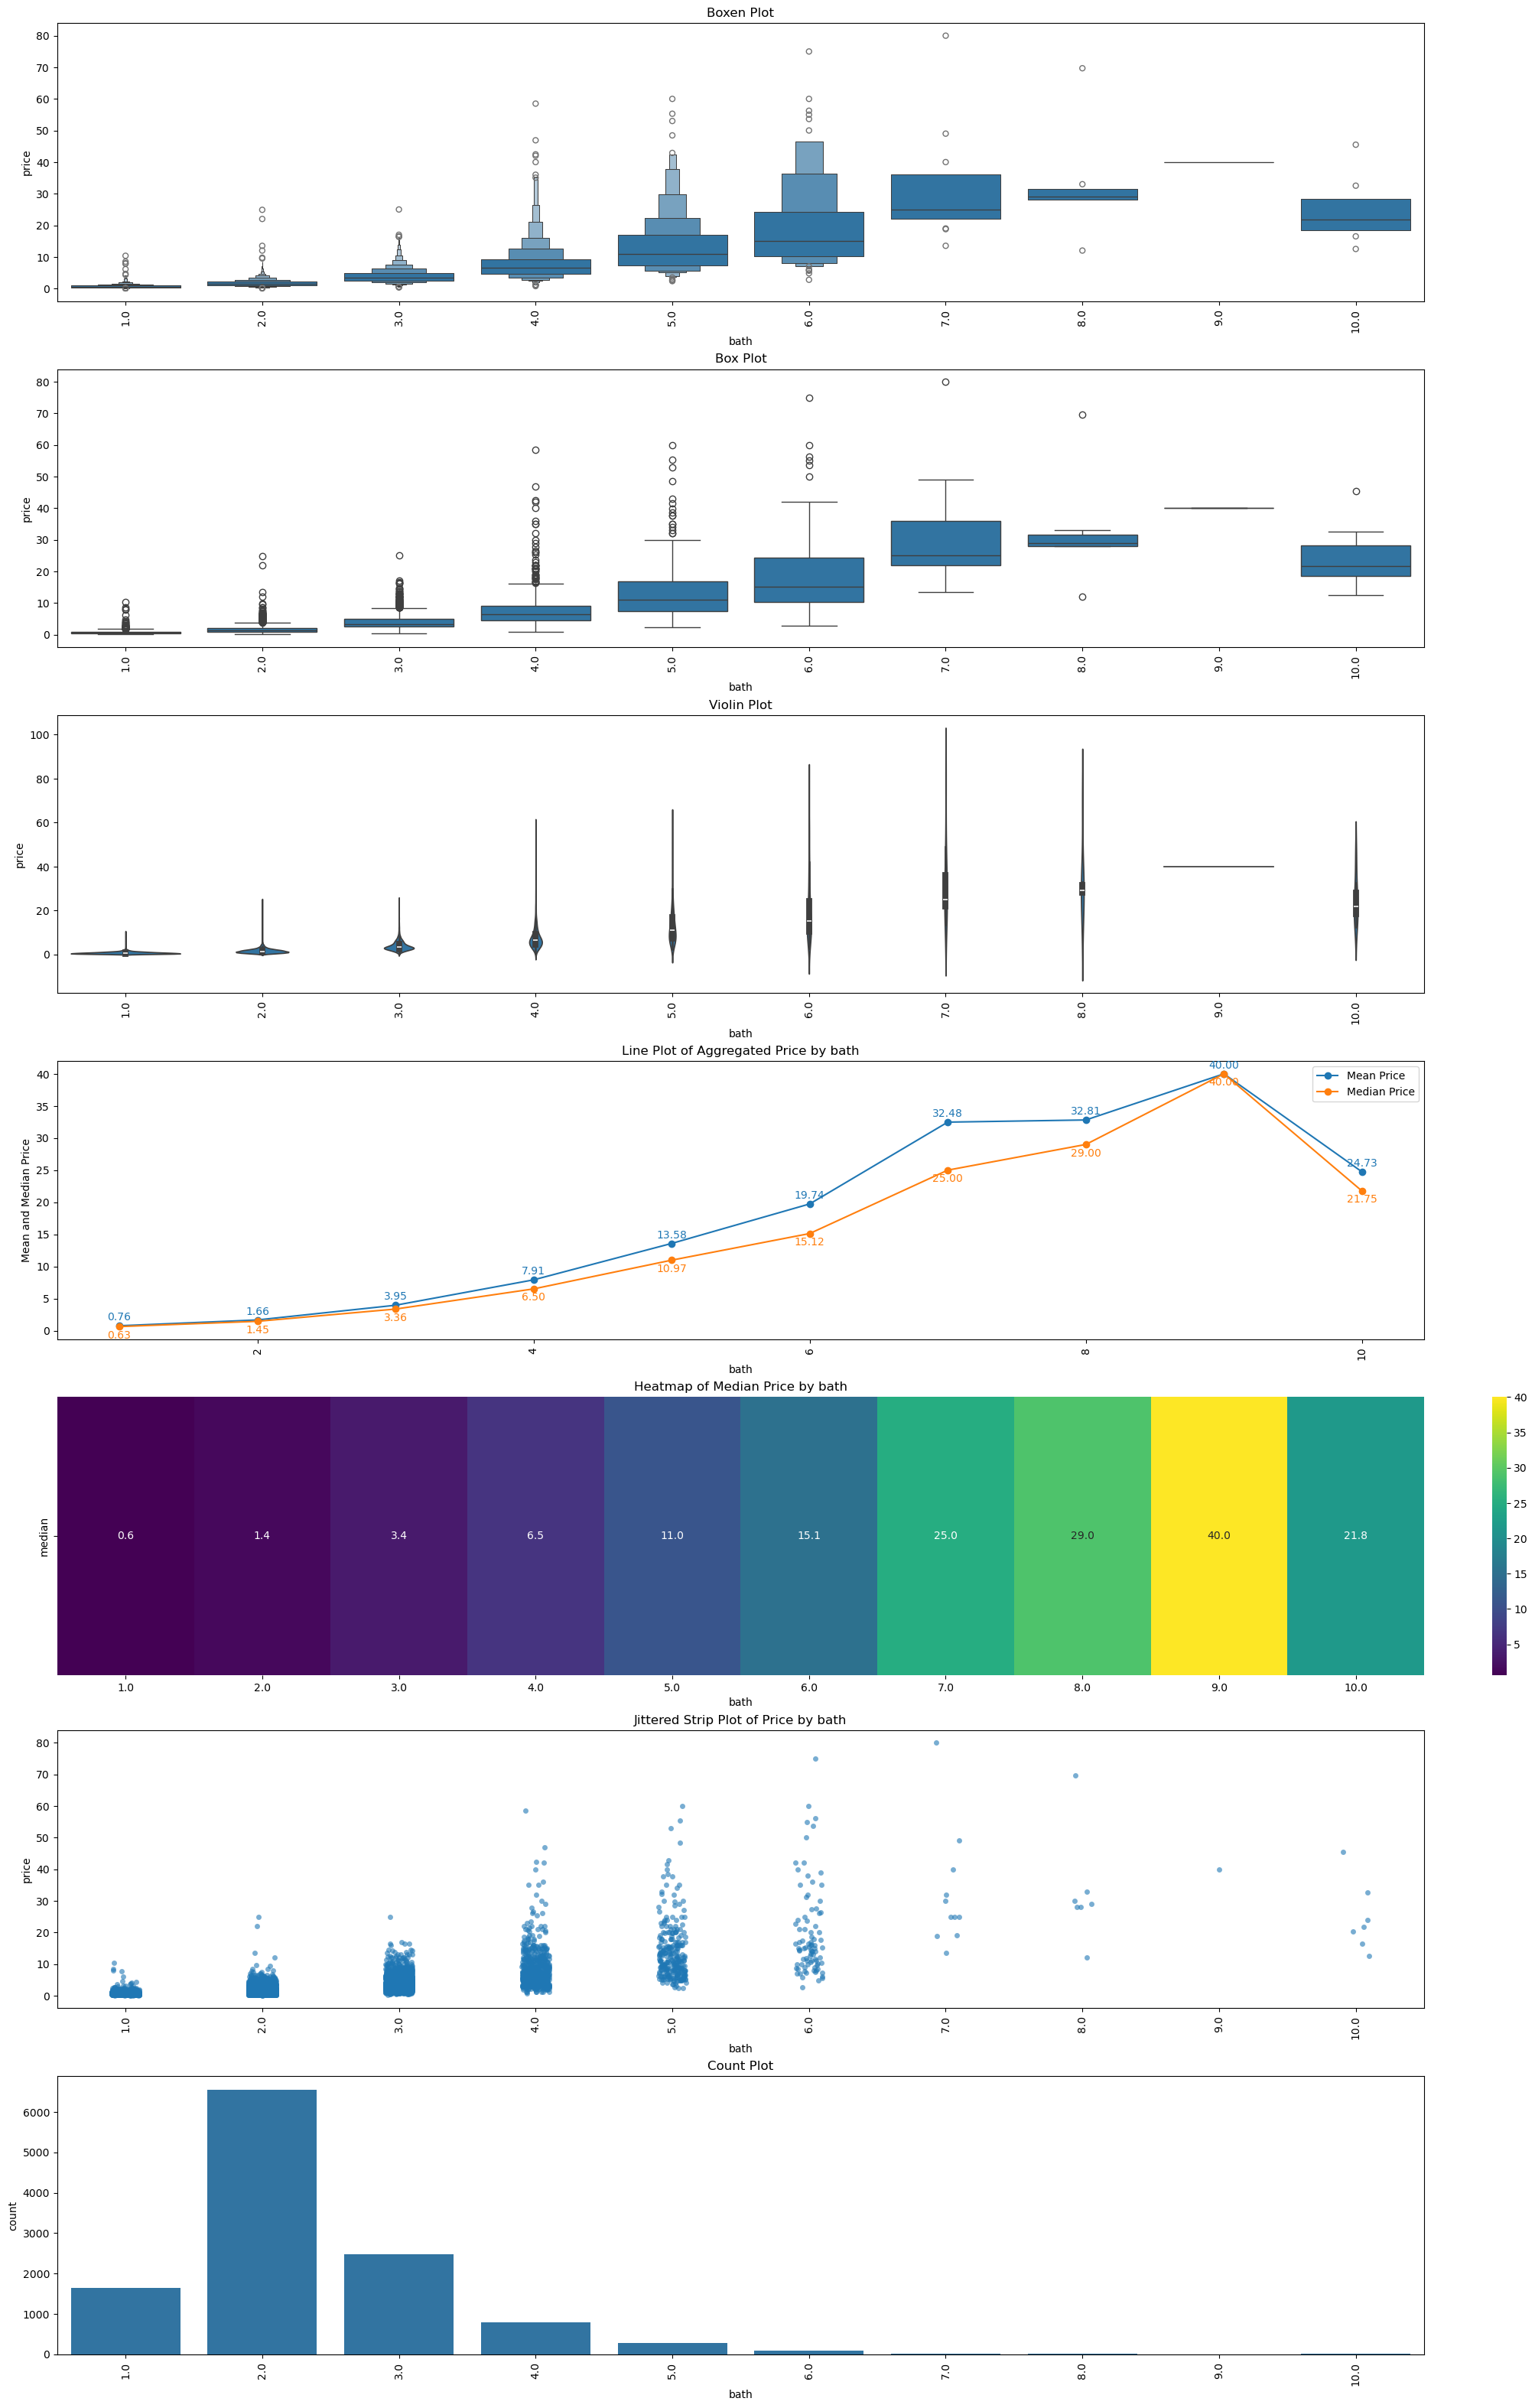

In [137]:
num_charts_plot(df, 'bath')

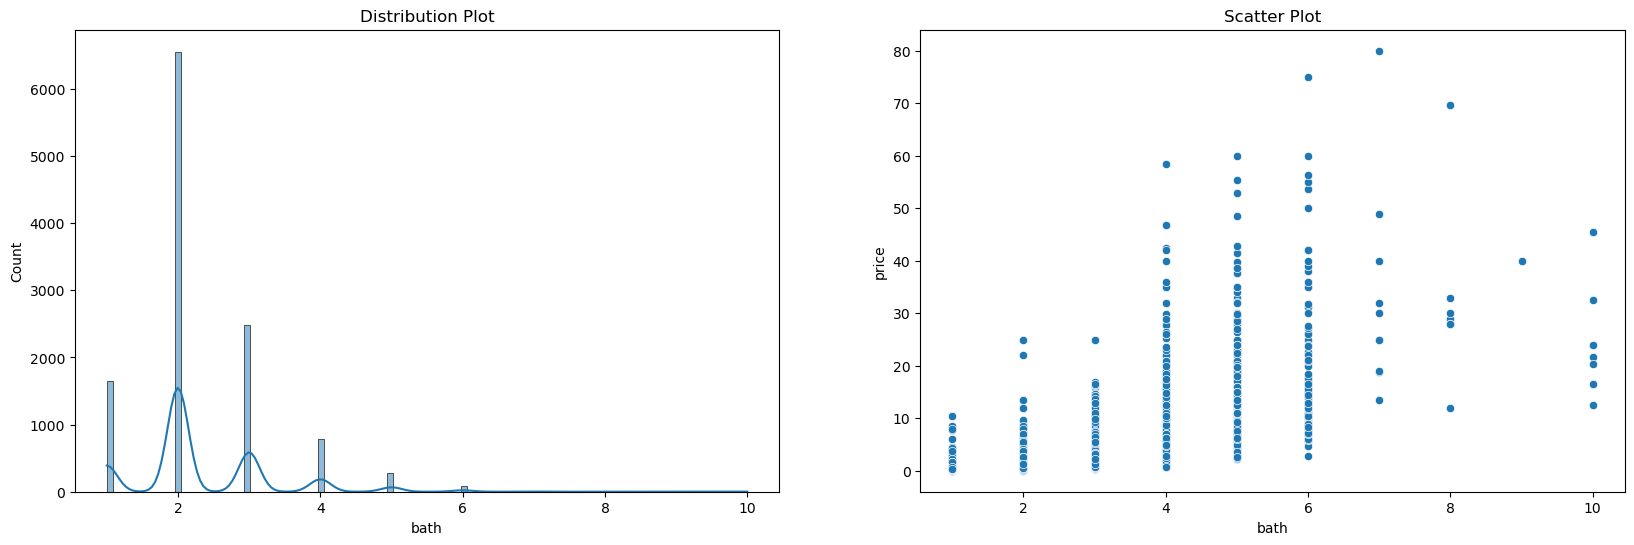

In [138]:
num_two_chart_plot(df, 'bath')

In [ ]:
def region_plots(df, feature):
    """
    Plots:
      1. Count plot of the feature by 'addressregion'
      2. Additional bar plot: 'price_category' vs feature (subplot at grid position (0,1))
      3. Bar plot of 'price' vs feature by 'addressregion'
      4. Bar plot of 'area' vs feature by 'addressregion'
      5. Bar plot of 'costpersqft' vs feature by 'addressregion'
      6. Bar plot of feature vs 'addressregion'
      7. KDE plot of price distribution by the feature (subplot at grid position (3,0))
    """
    # Create a figure with a grid of 4 rows x 2 columns
    fig = plt.figure(constrained_layout=True, figsize=(20, 20))
    grid = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
    
    # 1. Count plot with hue by addressregion at grid position (1,0)
    ax1 = fig.add_subplot(grid[1, 0])
    ax1.set_title(f"Count Plot of '{feature}' by 'addressregion'")
    sns.countplot(x=feature, hue='addressregion', data=df, ax=ax1)
    
    # 2. Bar plot: price_category vs feature at grid position (0,1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f"Barplot of '{feature}' mean and price categories")
    sns.barplot(x='price_category', y=feature, data=df, ax=ax2,estimator=np.mean, errorbar=None)
    # Rotate tick labels for better readability
    ax2.tick_params(axis='x', rotation=90)
    
    # 3. Bar plot: price vs feature by addressregion at grid position (0,0)
    ax3 = fig.add_subplot(grid[0, 0])
    ax3.set_title(f"Bar Plot of 'price' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='price', hue='addressregion', data=df, ax=ax3)
    
    # 4. Bar plot: area vs feature by addressregion at grid position (2,0)
    ax4 = fig.add_subplot(grid[2, 0])
    ax4.set_title(f"Bar Plot of 'area' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='area', hue='addressregion', data=df, ax=ax4)
    
    # 5. Bar plot: costpersqft vs feature by addressregion at grid position (2,1)
    ax5 = fig.add_subplot(grid[2, 1])
    ax5.set_title(f"Bar Plot of 'costpersqft' vs '{feature}' by 'addressregion'")
    sns.barplot(x=feature, y='costpersqft', hue='addressregion', data=df, ax=ax5)
    
    # 6. Bar plot: feature vs addressregion at grid position (1,1)
    ax6 = fig.add_subplot(grid[1, 1])
    ax6.set_title(f"Bar Plot of '{feature}' mean vs 'addressregion'")
    sns.barplot(x='addressregion', y=feature, data=df, ax=ax6,estimator=np.mean, errorbar=None)
    
    # 7. KDE plot: Price distribution by feature at grid position (3,0)
    ax7 = fig.add_subplot(grid[3, 0])
    ax7.set_title(f"Price Distribution by '{feature}' (KDE Plot)")
    sns.kdeplot(data=df, x="price", hue=feature, fill=True, common_norm=False, palette="tab10", linewidth=1.5, ax=ax7, warn_singular=False)
    ax7.set_xlabel("Price")
    ax7.set_ylabel("Density")
    
    plt.show()

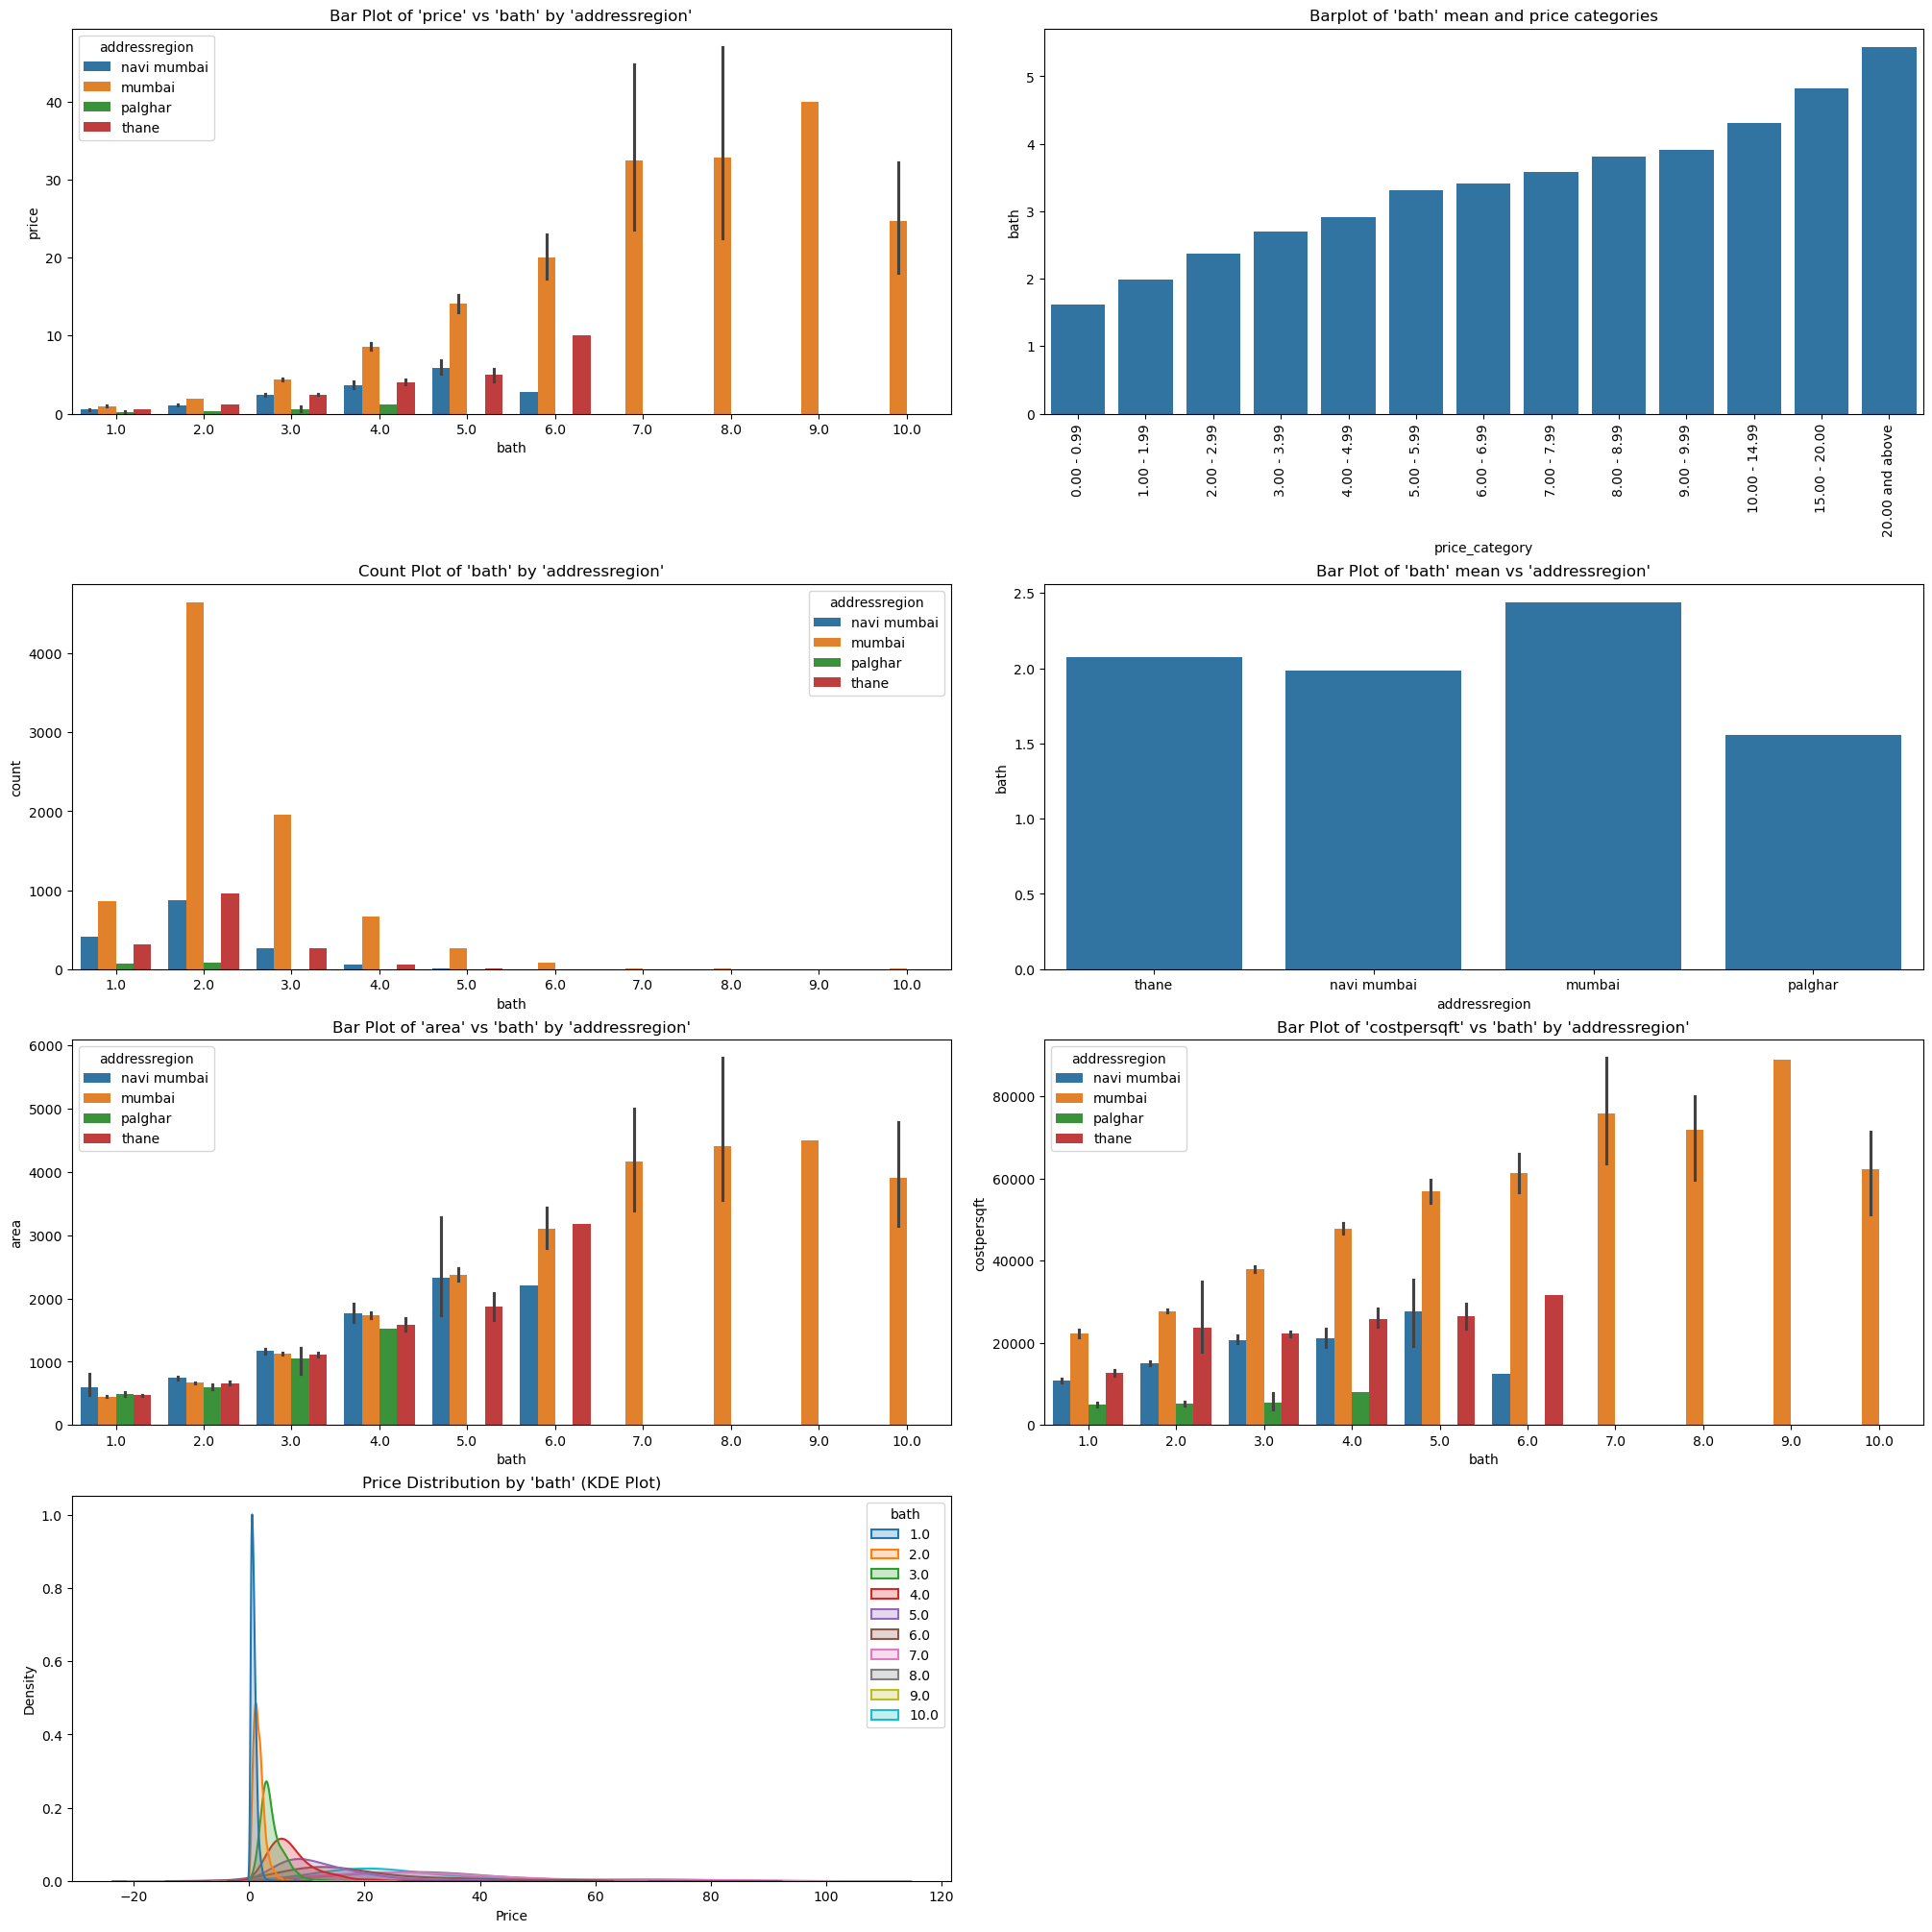

In [139]:
region_plots(df, 'bath')

In [140]:
summarize_properties(df, 'bath')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,0.757297,0.630,1651,861,0.900,405,0.454,309,0.570,76,0.205
1,2.0,1.663544,1.450,6556,4644,1.745,868,0.990,964,1.155,80,0.271
2,3.0,3.953157,3.360,2484,1956,3.750,260,2.205,265,2.380,3,0.500
3,4.0,7.907875,6.500,781,667,7.000,54,3.245,59,3.620,1,1.220
4,5.0,13.581223,10.975,278,262,11.280,4,5.725,12,5.025,0,NaN
5,6.0,19.736364,15.125,88,86,15.275,1,2.750,1,10.000,0,NaN
6,7.0,32.479091,25.000,11,11,25.000,0,NaN,0,NaN,0,NaN
7,8.0,32.814286,29.000,7,7,29.000,0,NaN,0,NaN,0,NaN
8,9.0,40.000000,40.000,1,1,40.000,0,NaN,0,NaN,0,NaN
9,10.0,24.732857,21.750,7,7,21.750,0,NaN,0,NaN,0,NaN


In [142]:
print(medians['price_area_difference'])

0    2.302585
1    2.295518
2    2.311024
3    2.266217
4    2.253260
Name: price_area_difference, dtype: float64


### parking

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


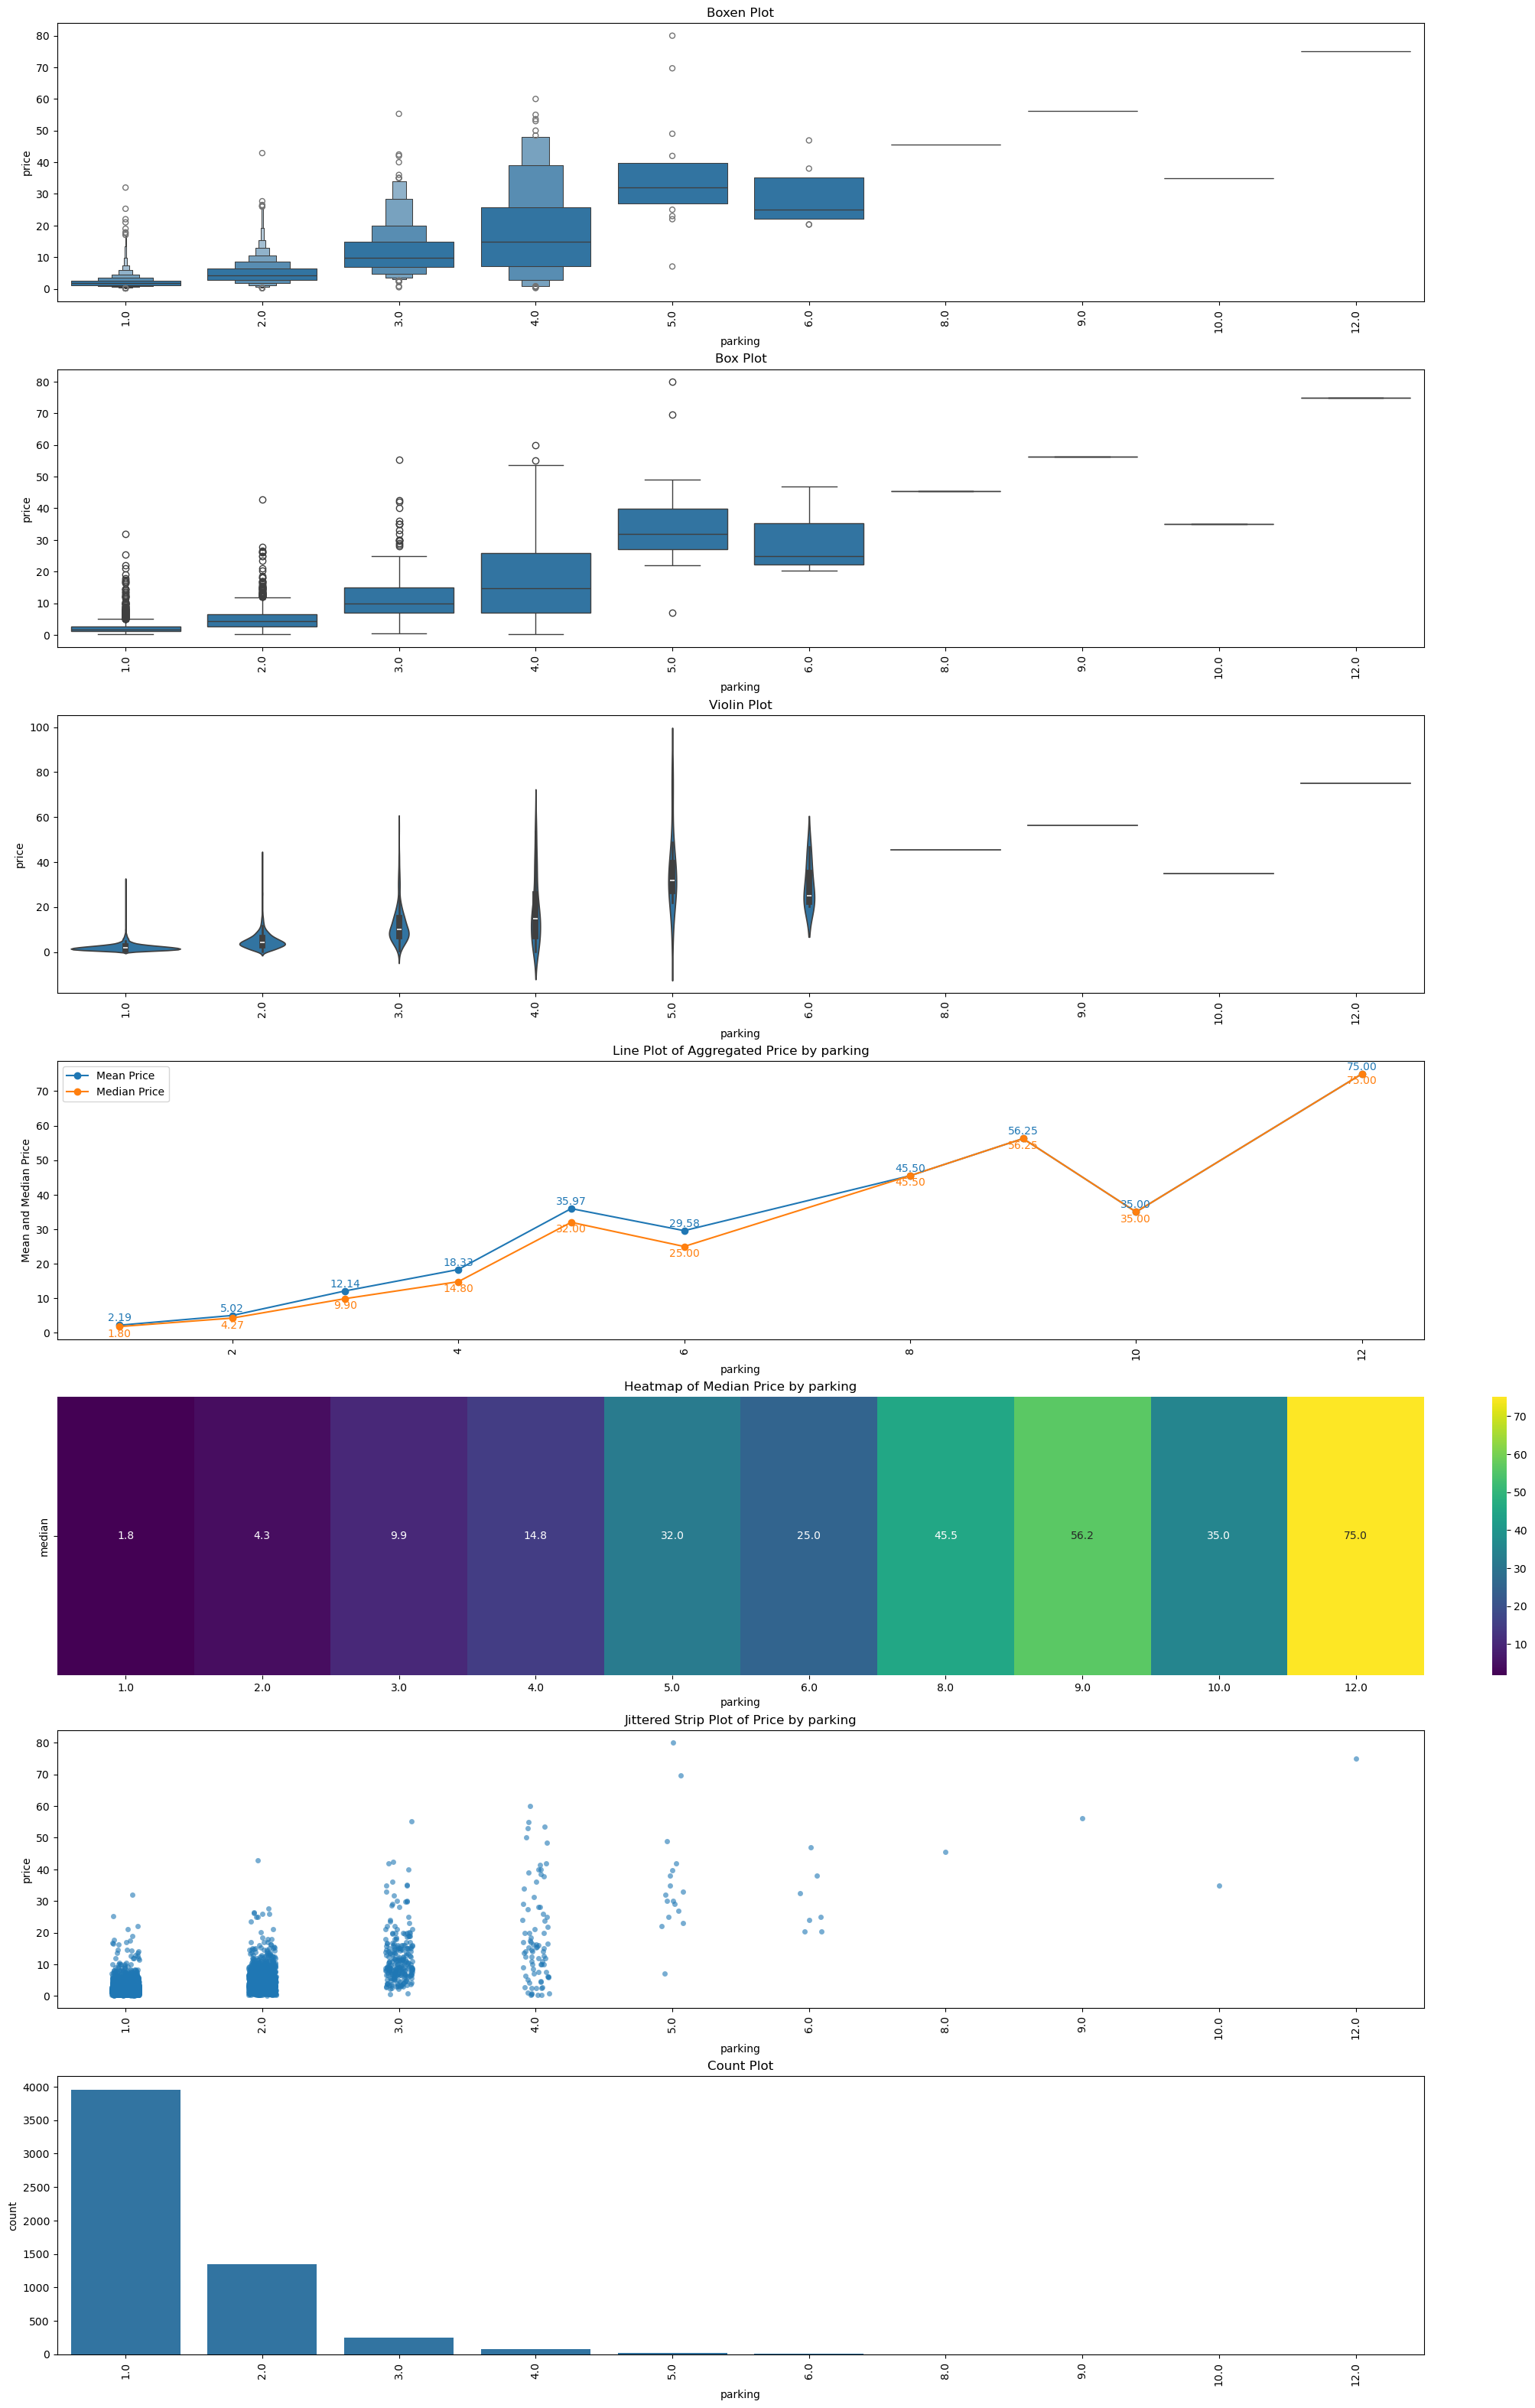

In [25]:
num_charts_plot(df, 'parking')

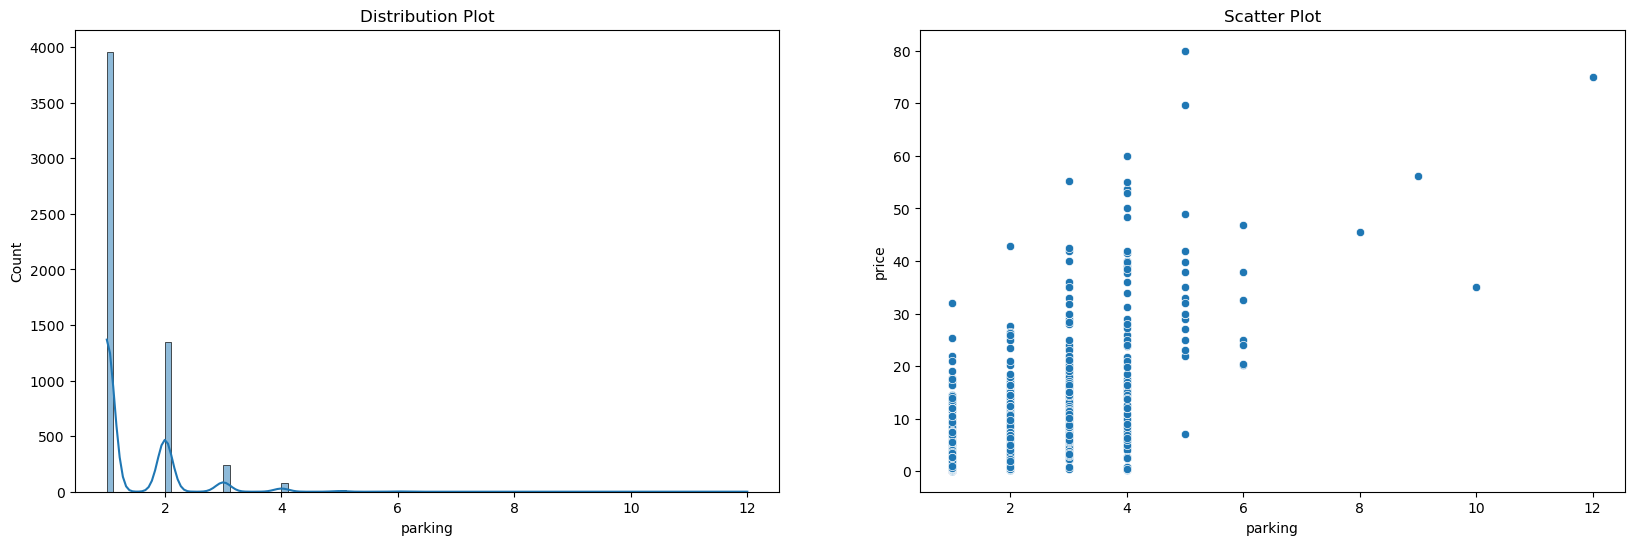

In [26]:
num_two_chart_plot(df, 'parking')

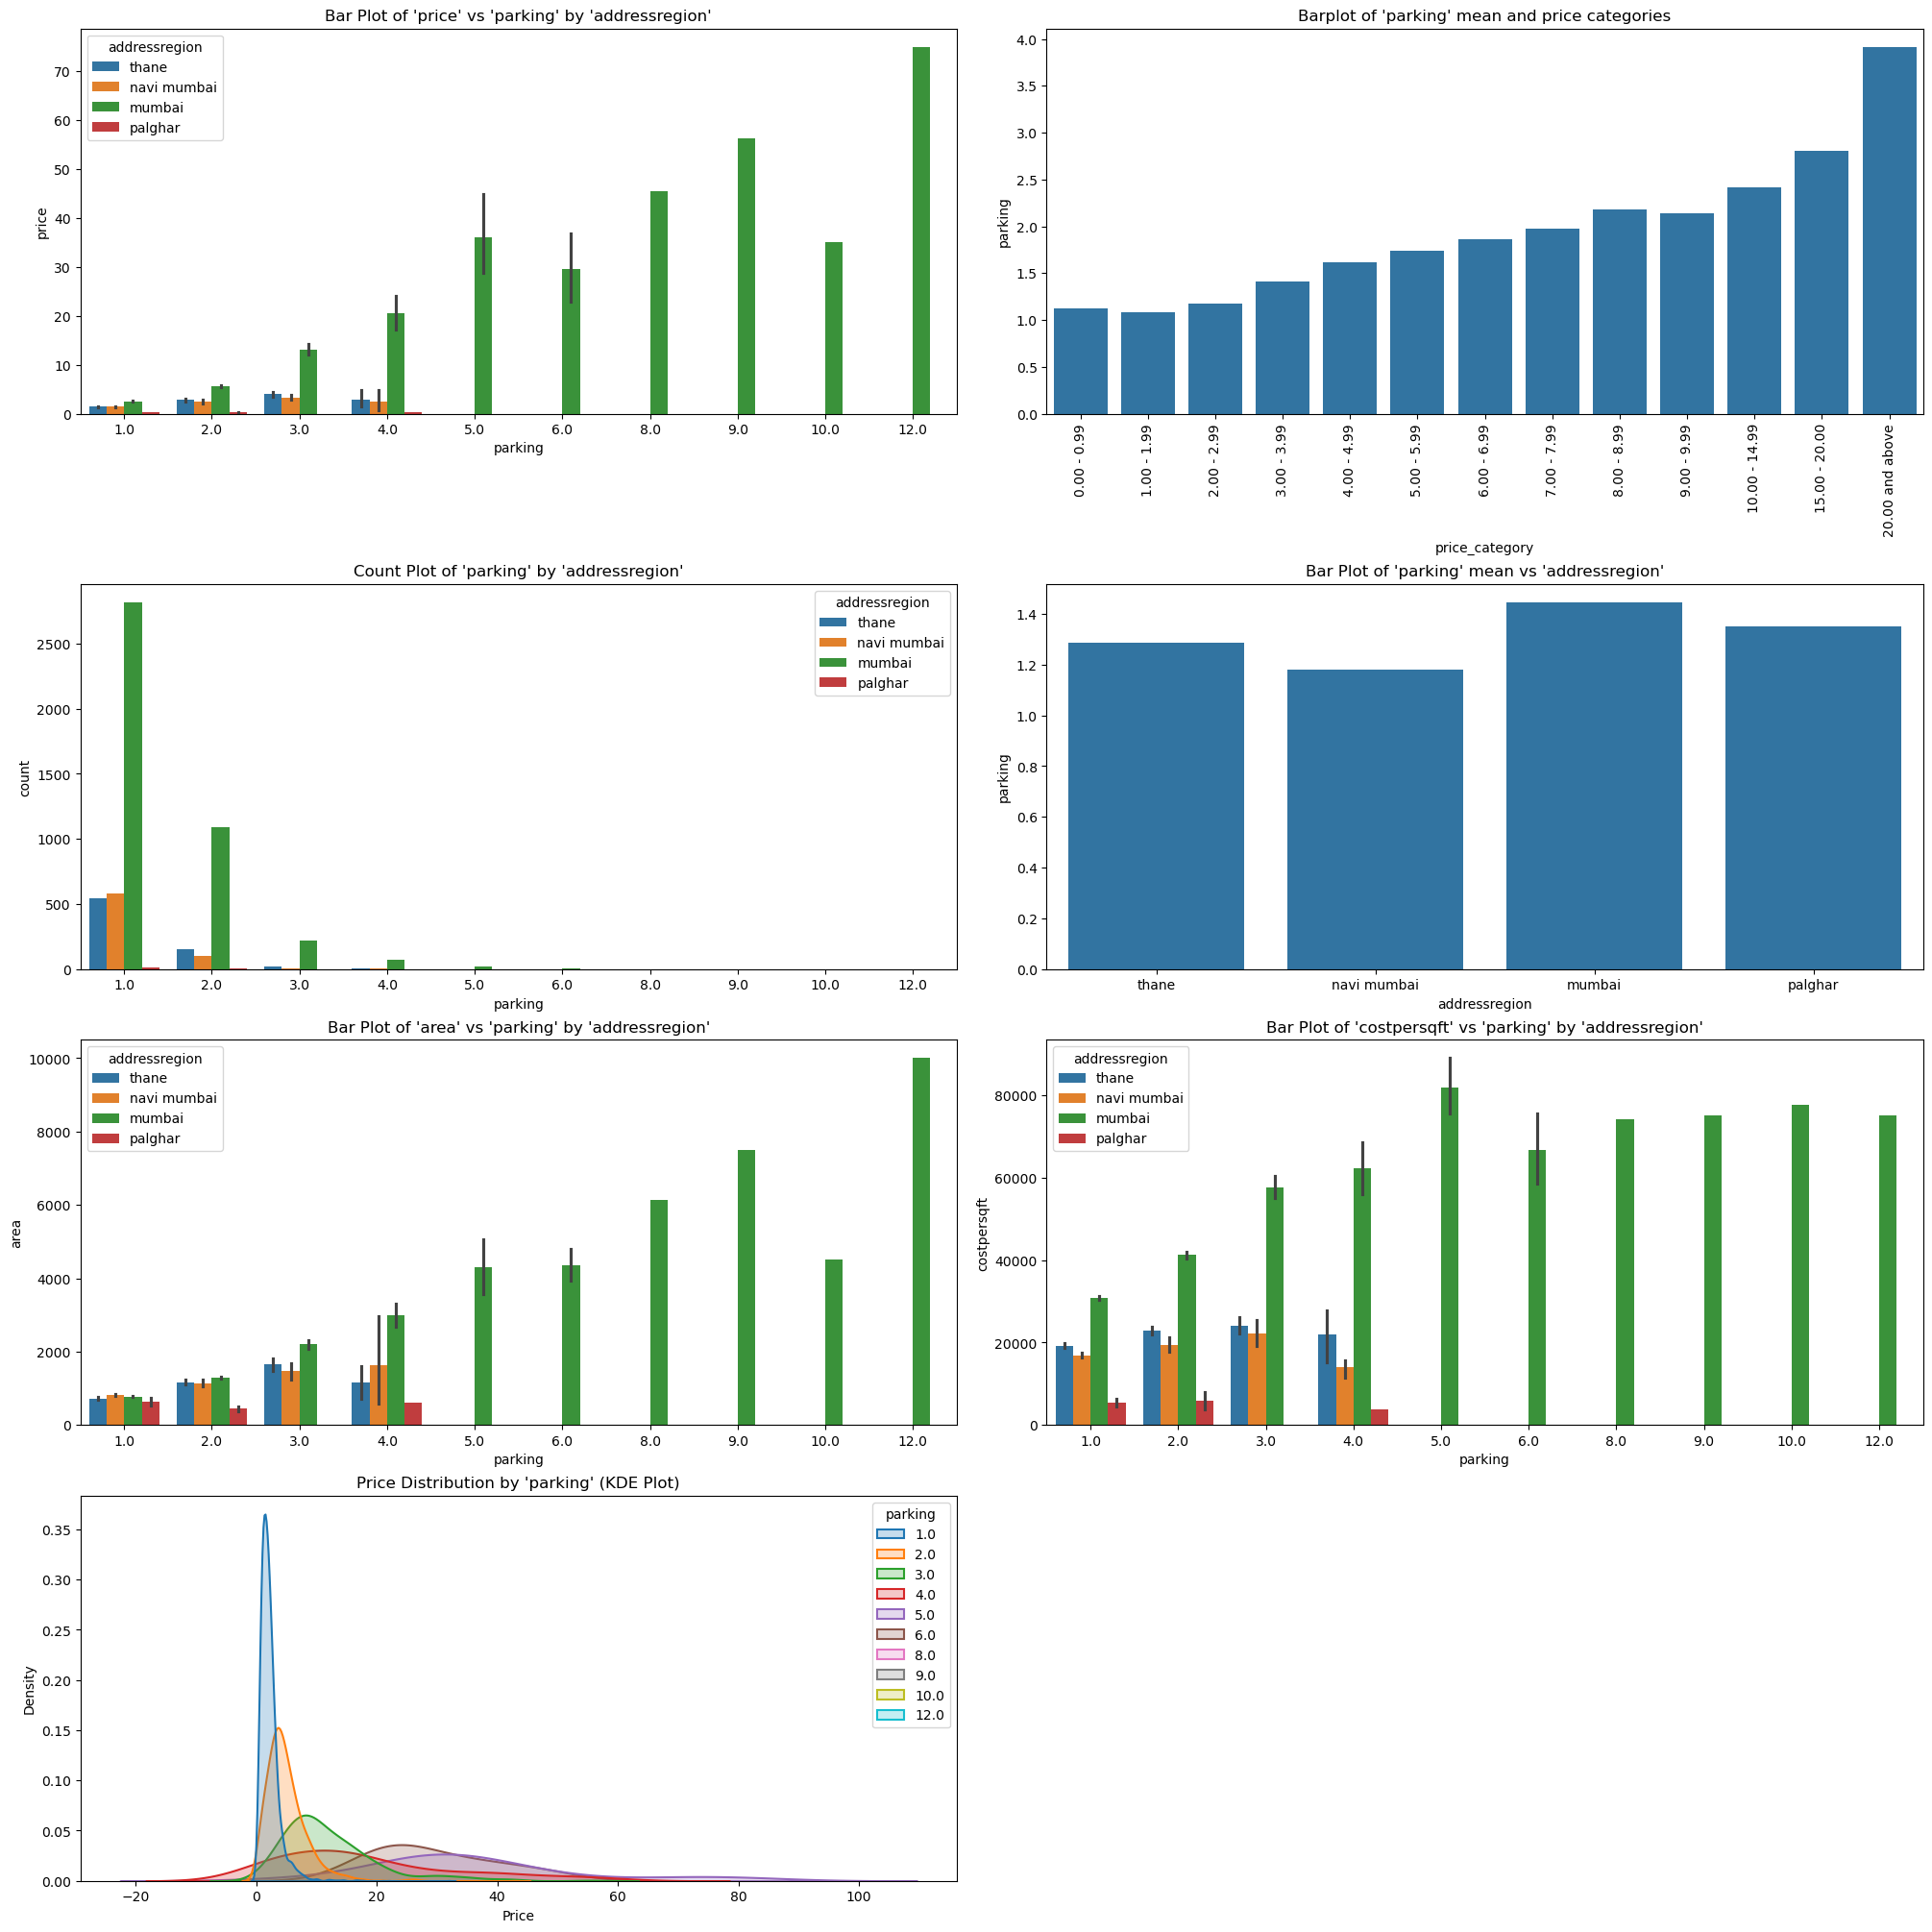

In [27]:
region_plots(df, 'parking')

In [28]:
summarize_properties(df, 'parking')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,2.191896,1.800,3959,2817,2.100,584,1.175,543,1.25,15,0.3000
1,2.0,5.016486,4.265,1350,1091,4.800,105,2.000,150,2.55,4,0.2235
2,3.0,12.138189,9.900,243,218,11.000,4,3.085,21,3.70,0,NaN
3,4.0,18.325976,14.800,82,72,16.095,4,1.710,5,2.55,1,0.2300
4,5.0,35.973529,32.000,17,17,32.000,0,NaN,0,NaN,0,NaN
5,6.0,29.582857,25.000,7,7,25.000,0,NaN,0,NaN,0,NaN
6,8.0,45.500000,45.500,1,1,45.500,0,NaN,0,NaN,0,NaN
7,9.0,56.250000,56.250,1,1,56.250,0,NaN,0,NaN,0,NaN
8,10.0,35.000000,35.000,1,1,35.000,0,NaN,0,NaN,0,NaN
9,12.0,75.000000,75.000,1,1,75.000,0,NaN,0,NaN,0,NaN


### lift

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


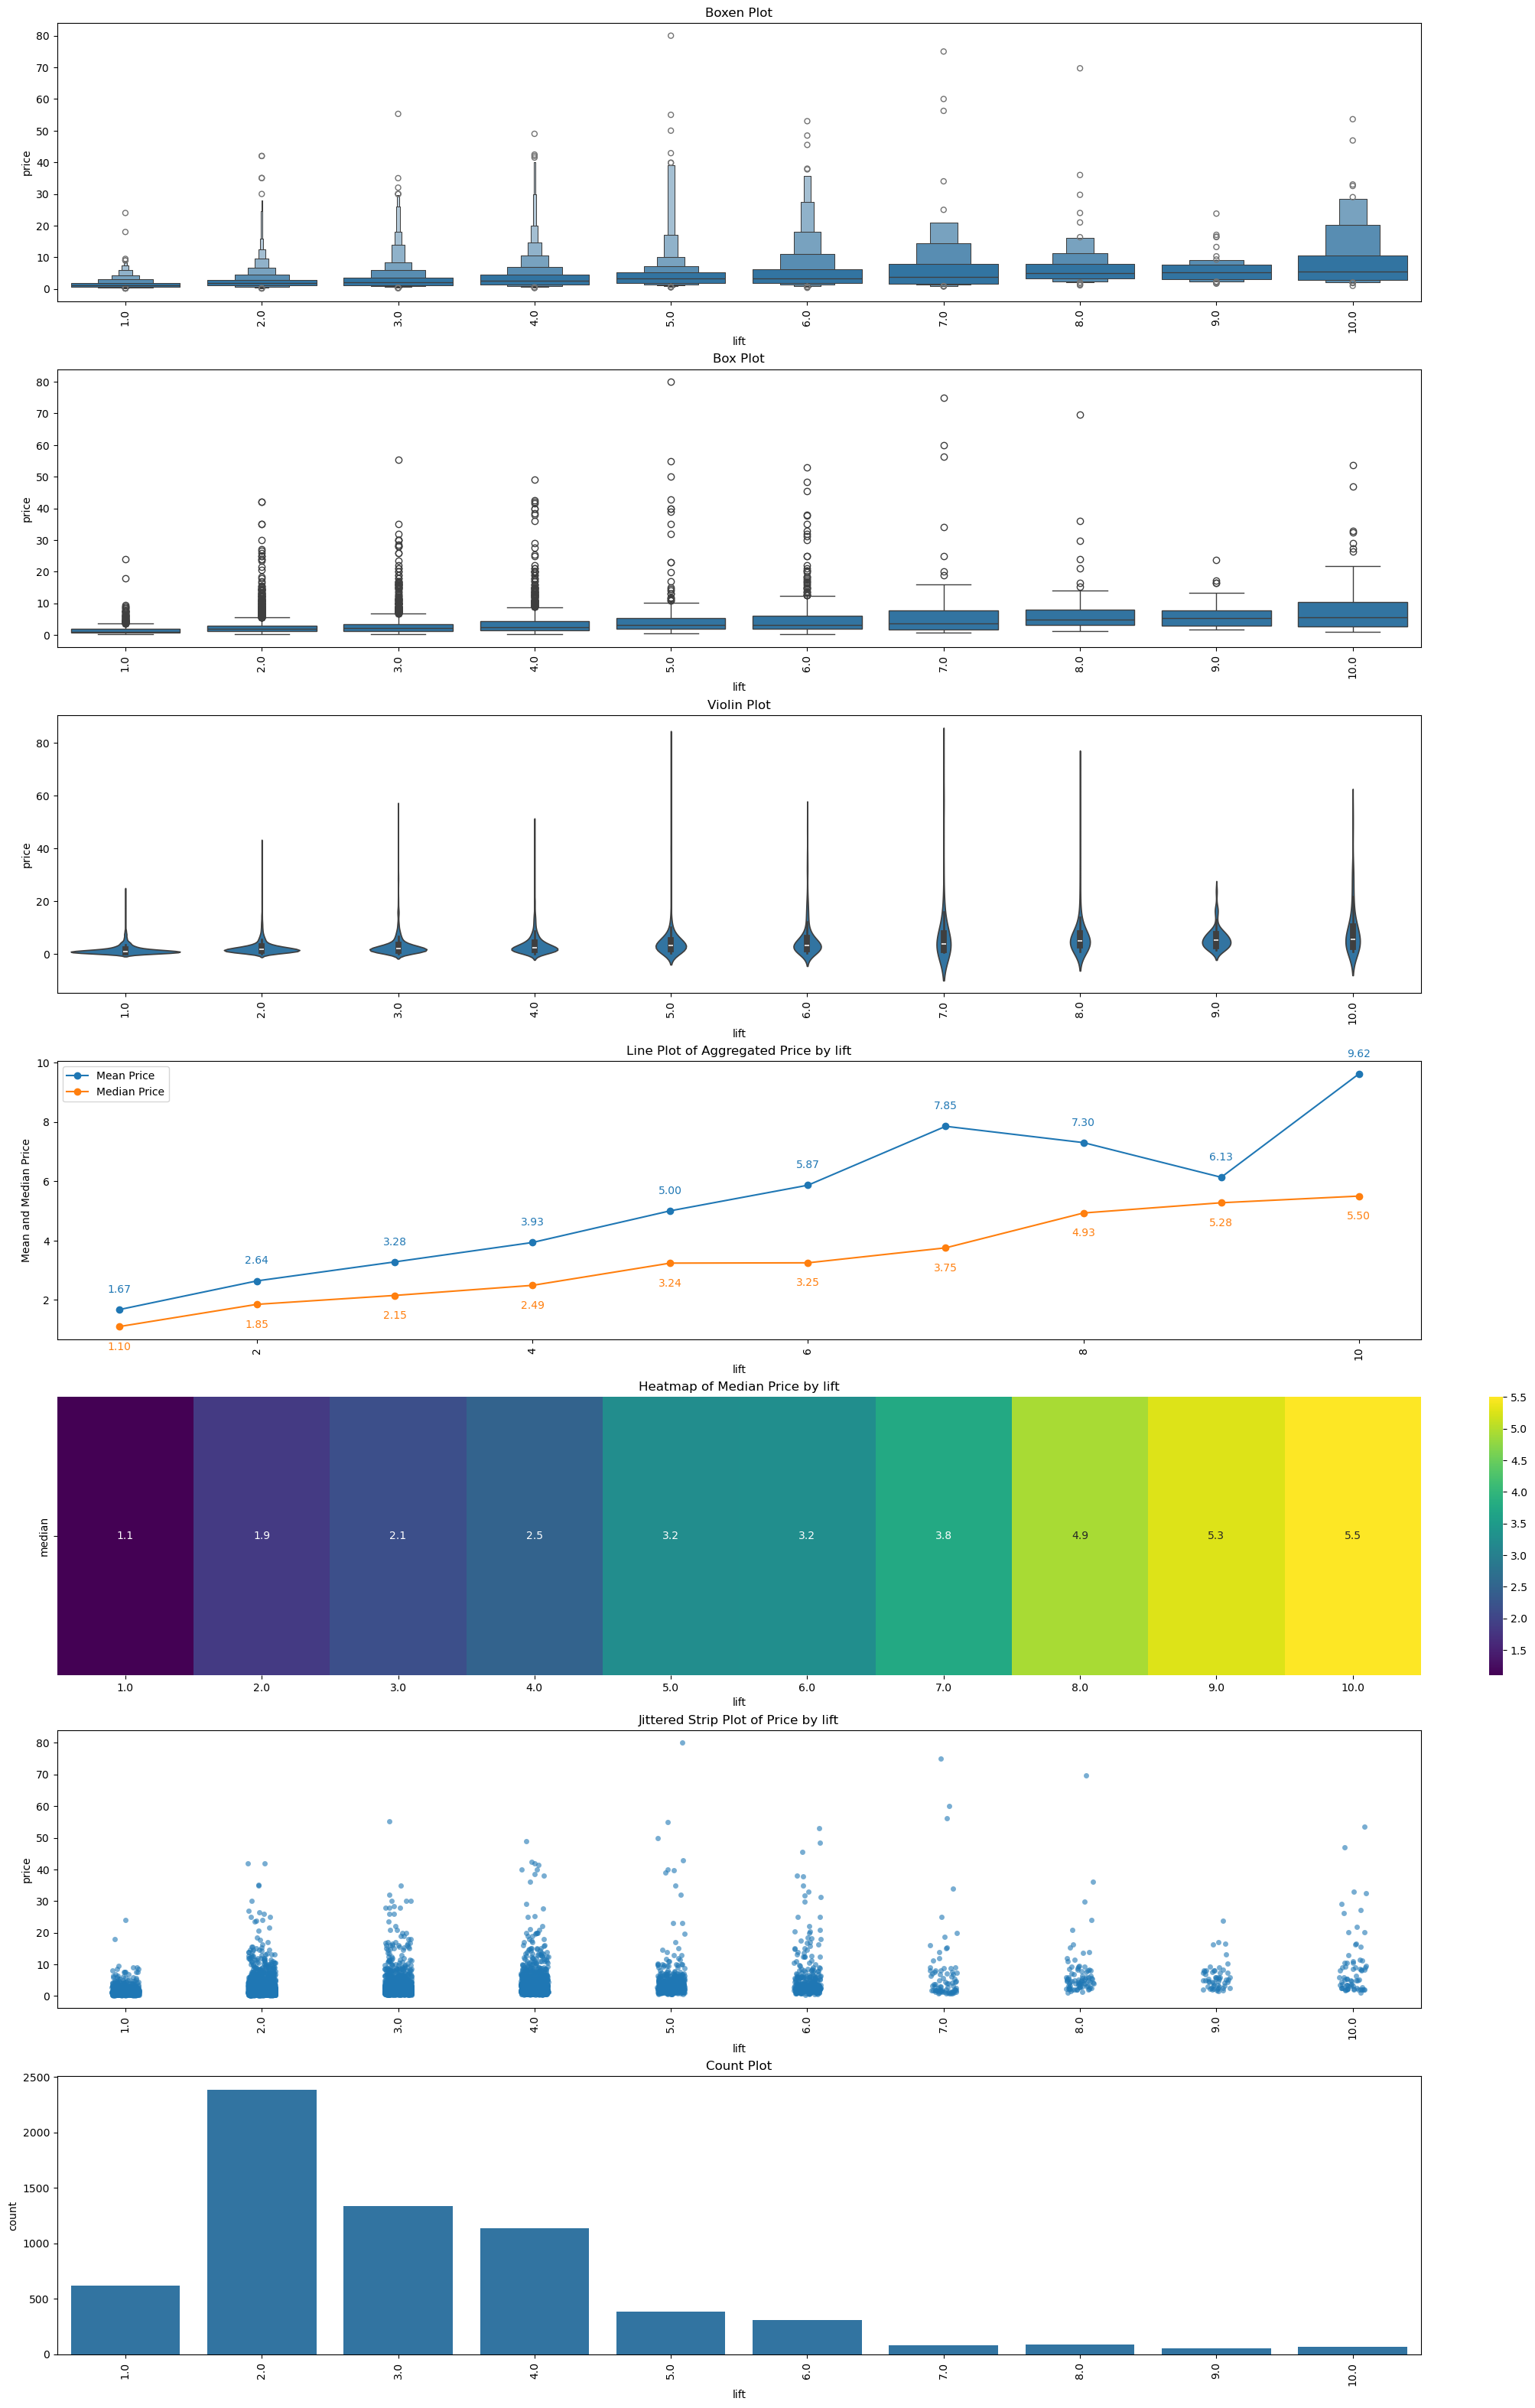

In [30]:
num_charts_plot(df, 'lift')

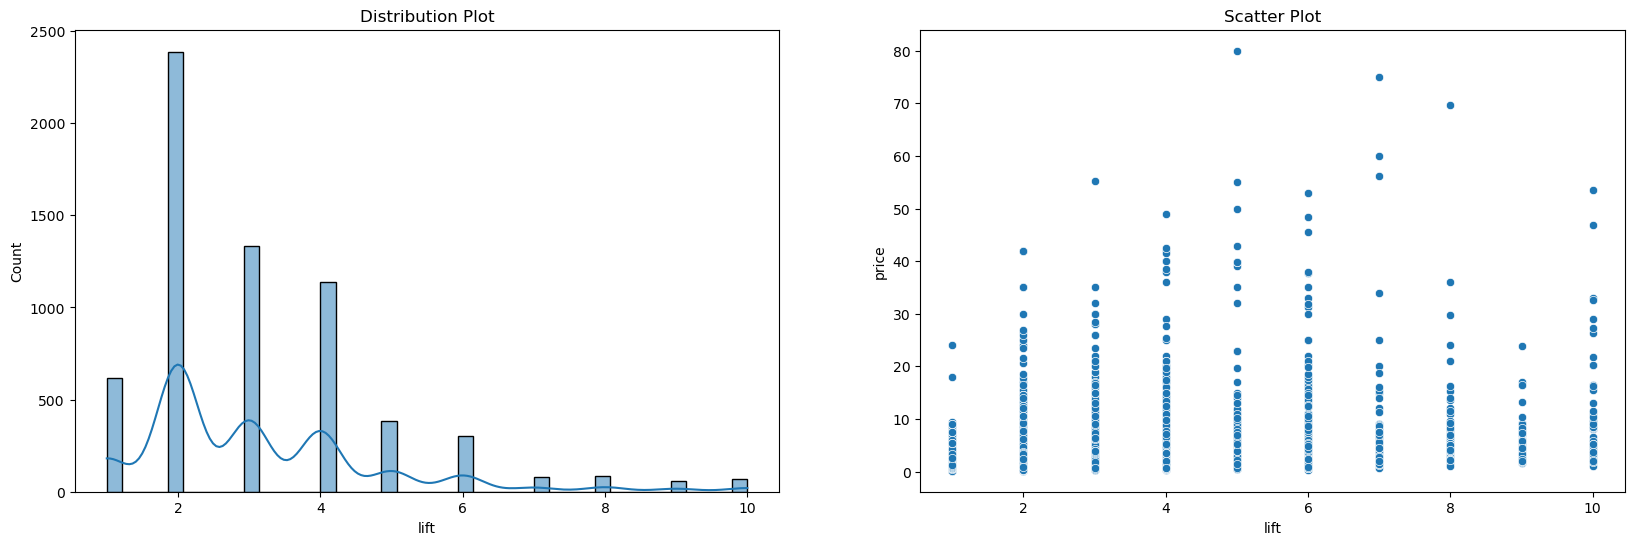

In [31]:
num_two_chart_plot(df, 'lift')

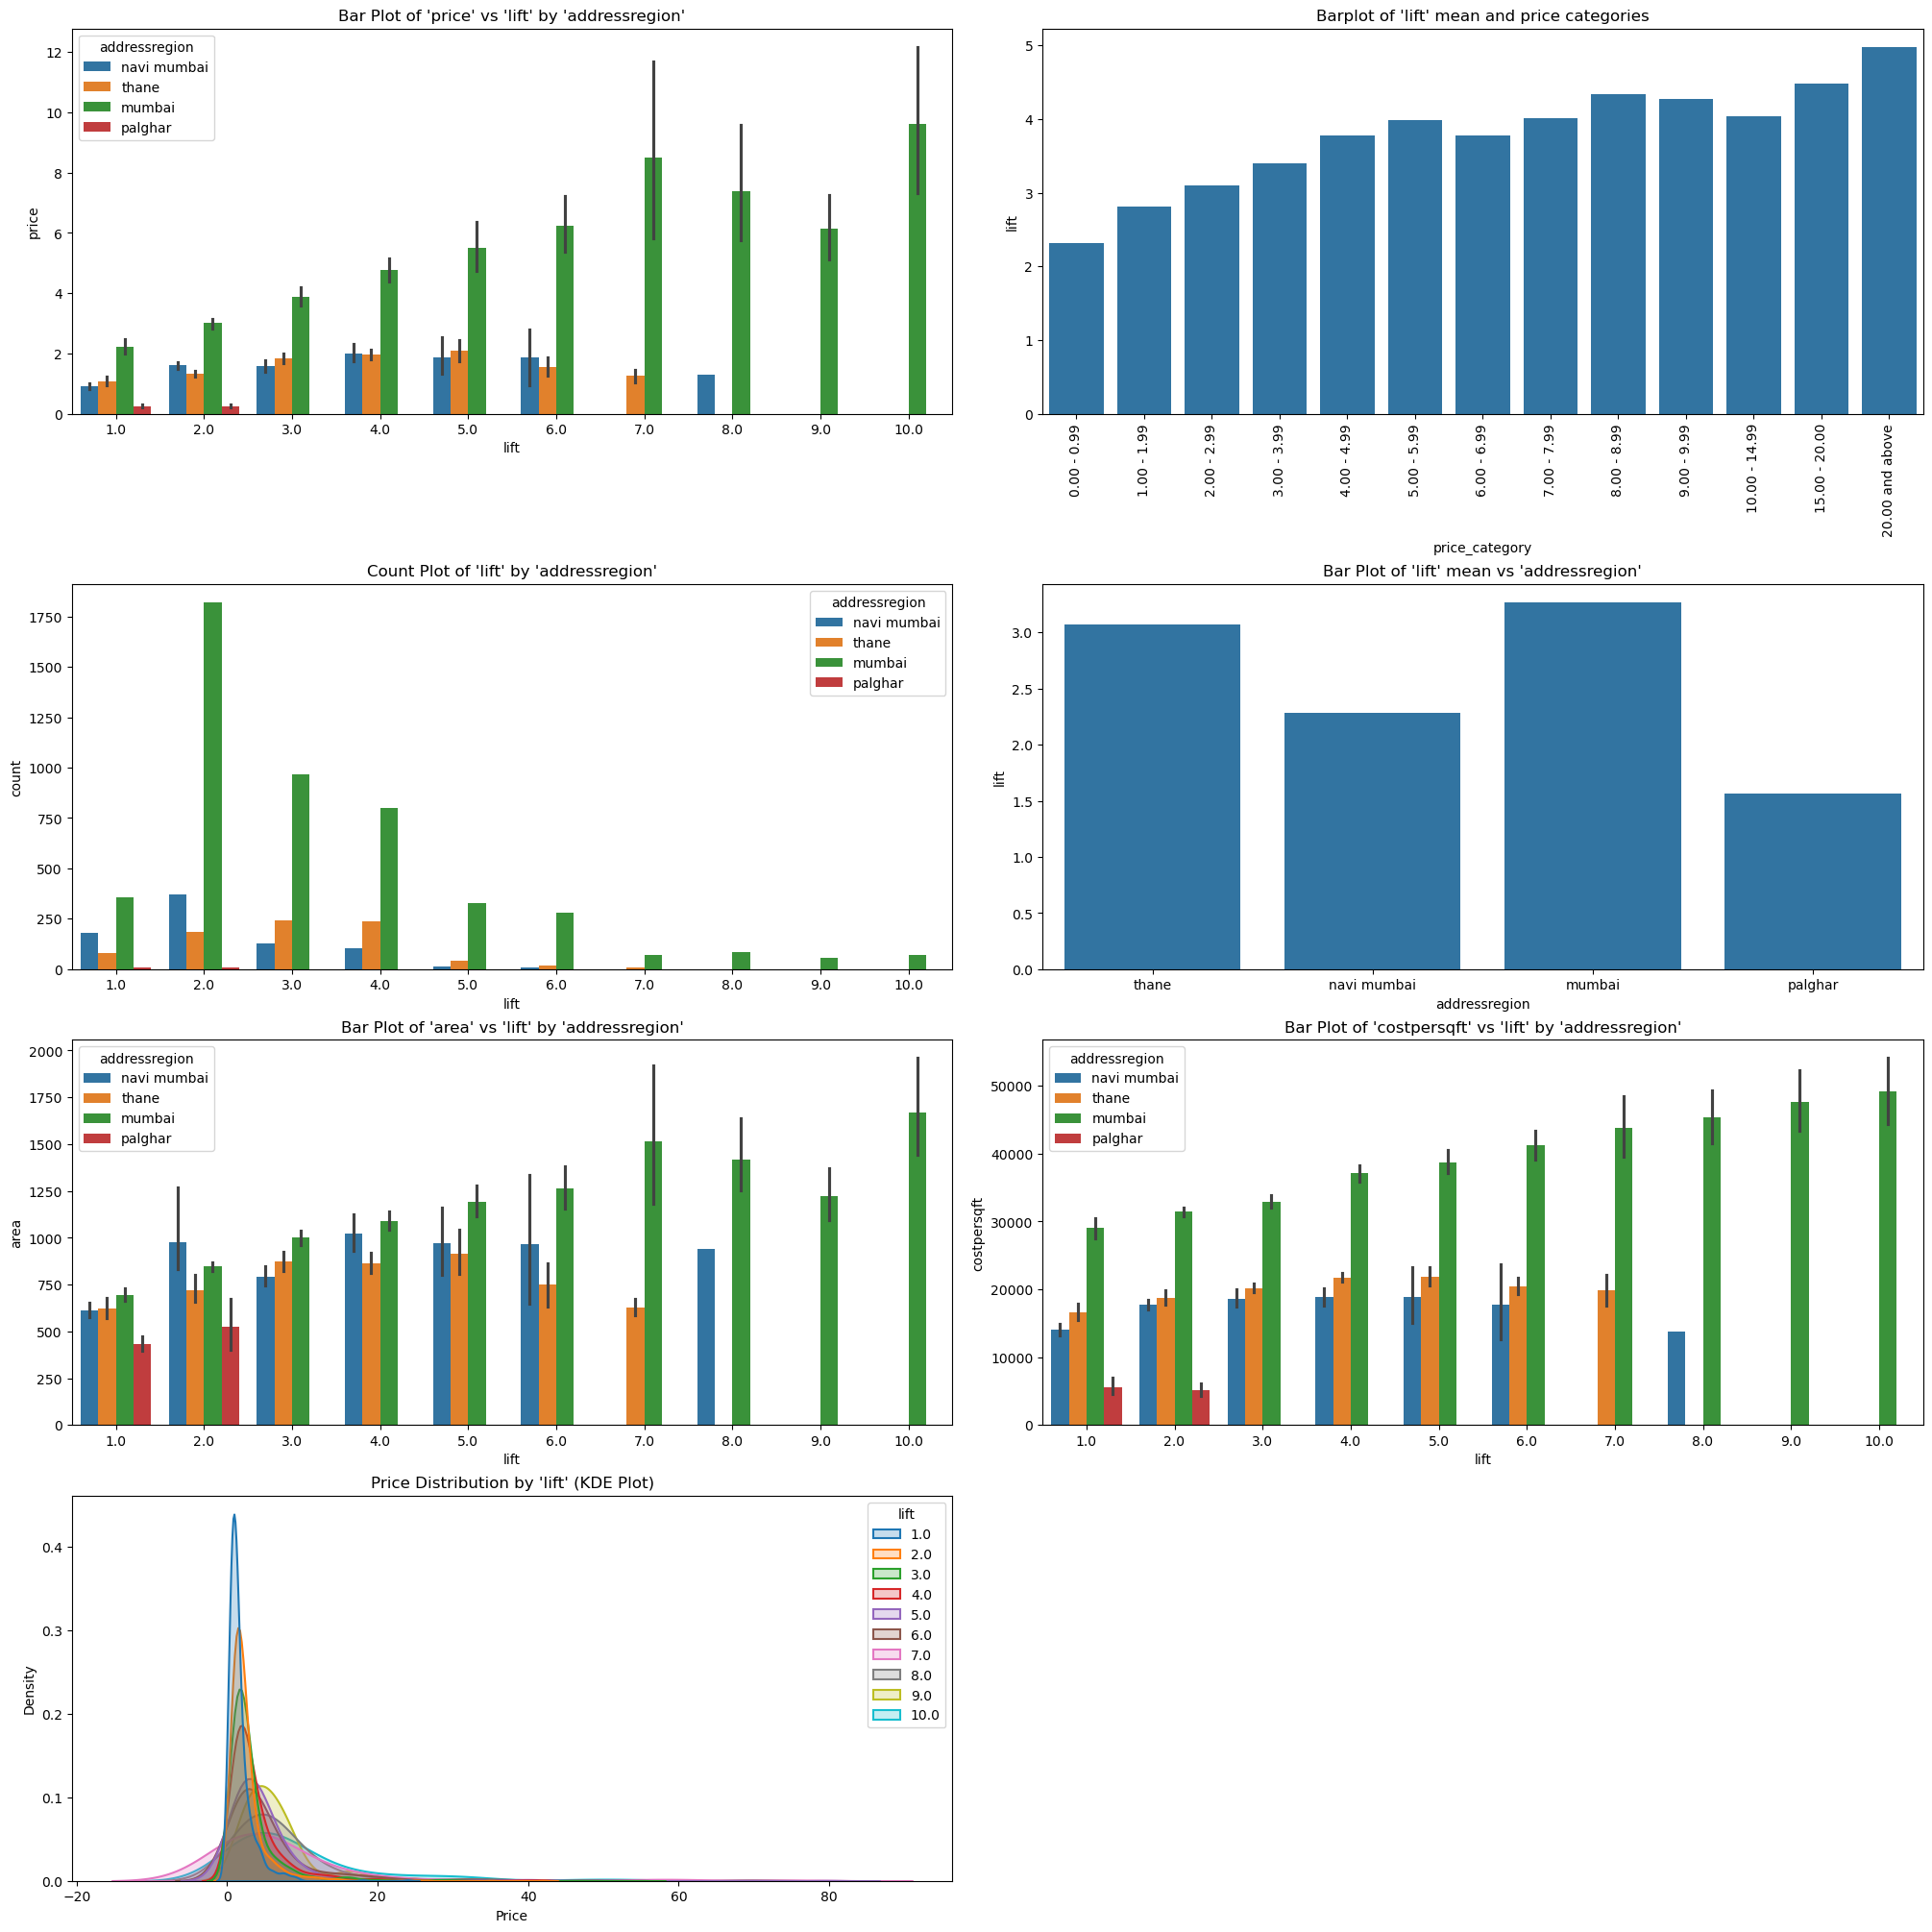

In [32]:
region_plots(df, 'lift')

In [33]:
summarize_properties(df, 'lift')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,1.671859,1.100,619,355,1.500,179,0.725,78,0.92,7,0.220
1,2.0,2.640319,1.850,2387,1820,2.040,371,1.300,187,1.20,9,0.227
2,3.0,3.280356,2.150,1333,965,2.420,127,1.250,241,1.50,0,NaN
3,4.0,3.934976,2.490,1138,800,3.150,102,1.745,236,1.50,0,NaN
4,5.0,5.002709,3.240,385,329,3.750,14,1.355,42,1.70,0,NaN
5,6.0,5.866938,3.250,305,281,3.500,7,1.000,17,1.50,0,NaN
6,7.0,7.852628,3.755,78,71,4.210,0,NaN,7,1.21,0,NaN
7,8.0,7.302824,4.930,85,84,4.960,1,1.290,0,NaN,0,NaN
8,9.0,6.133750,5.275,56,56,5.275,0,NaN,0,NaN,0,NaN
9,10.0,9.621304,5.500,69,69,5.500,0,NaN,0,NaN,0,NaN


### balcony

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


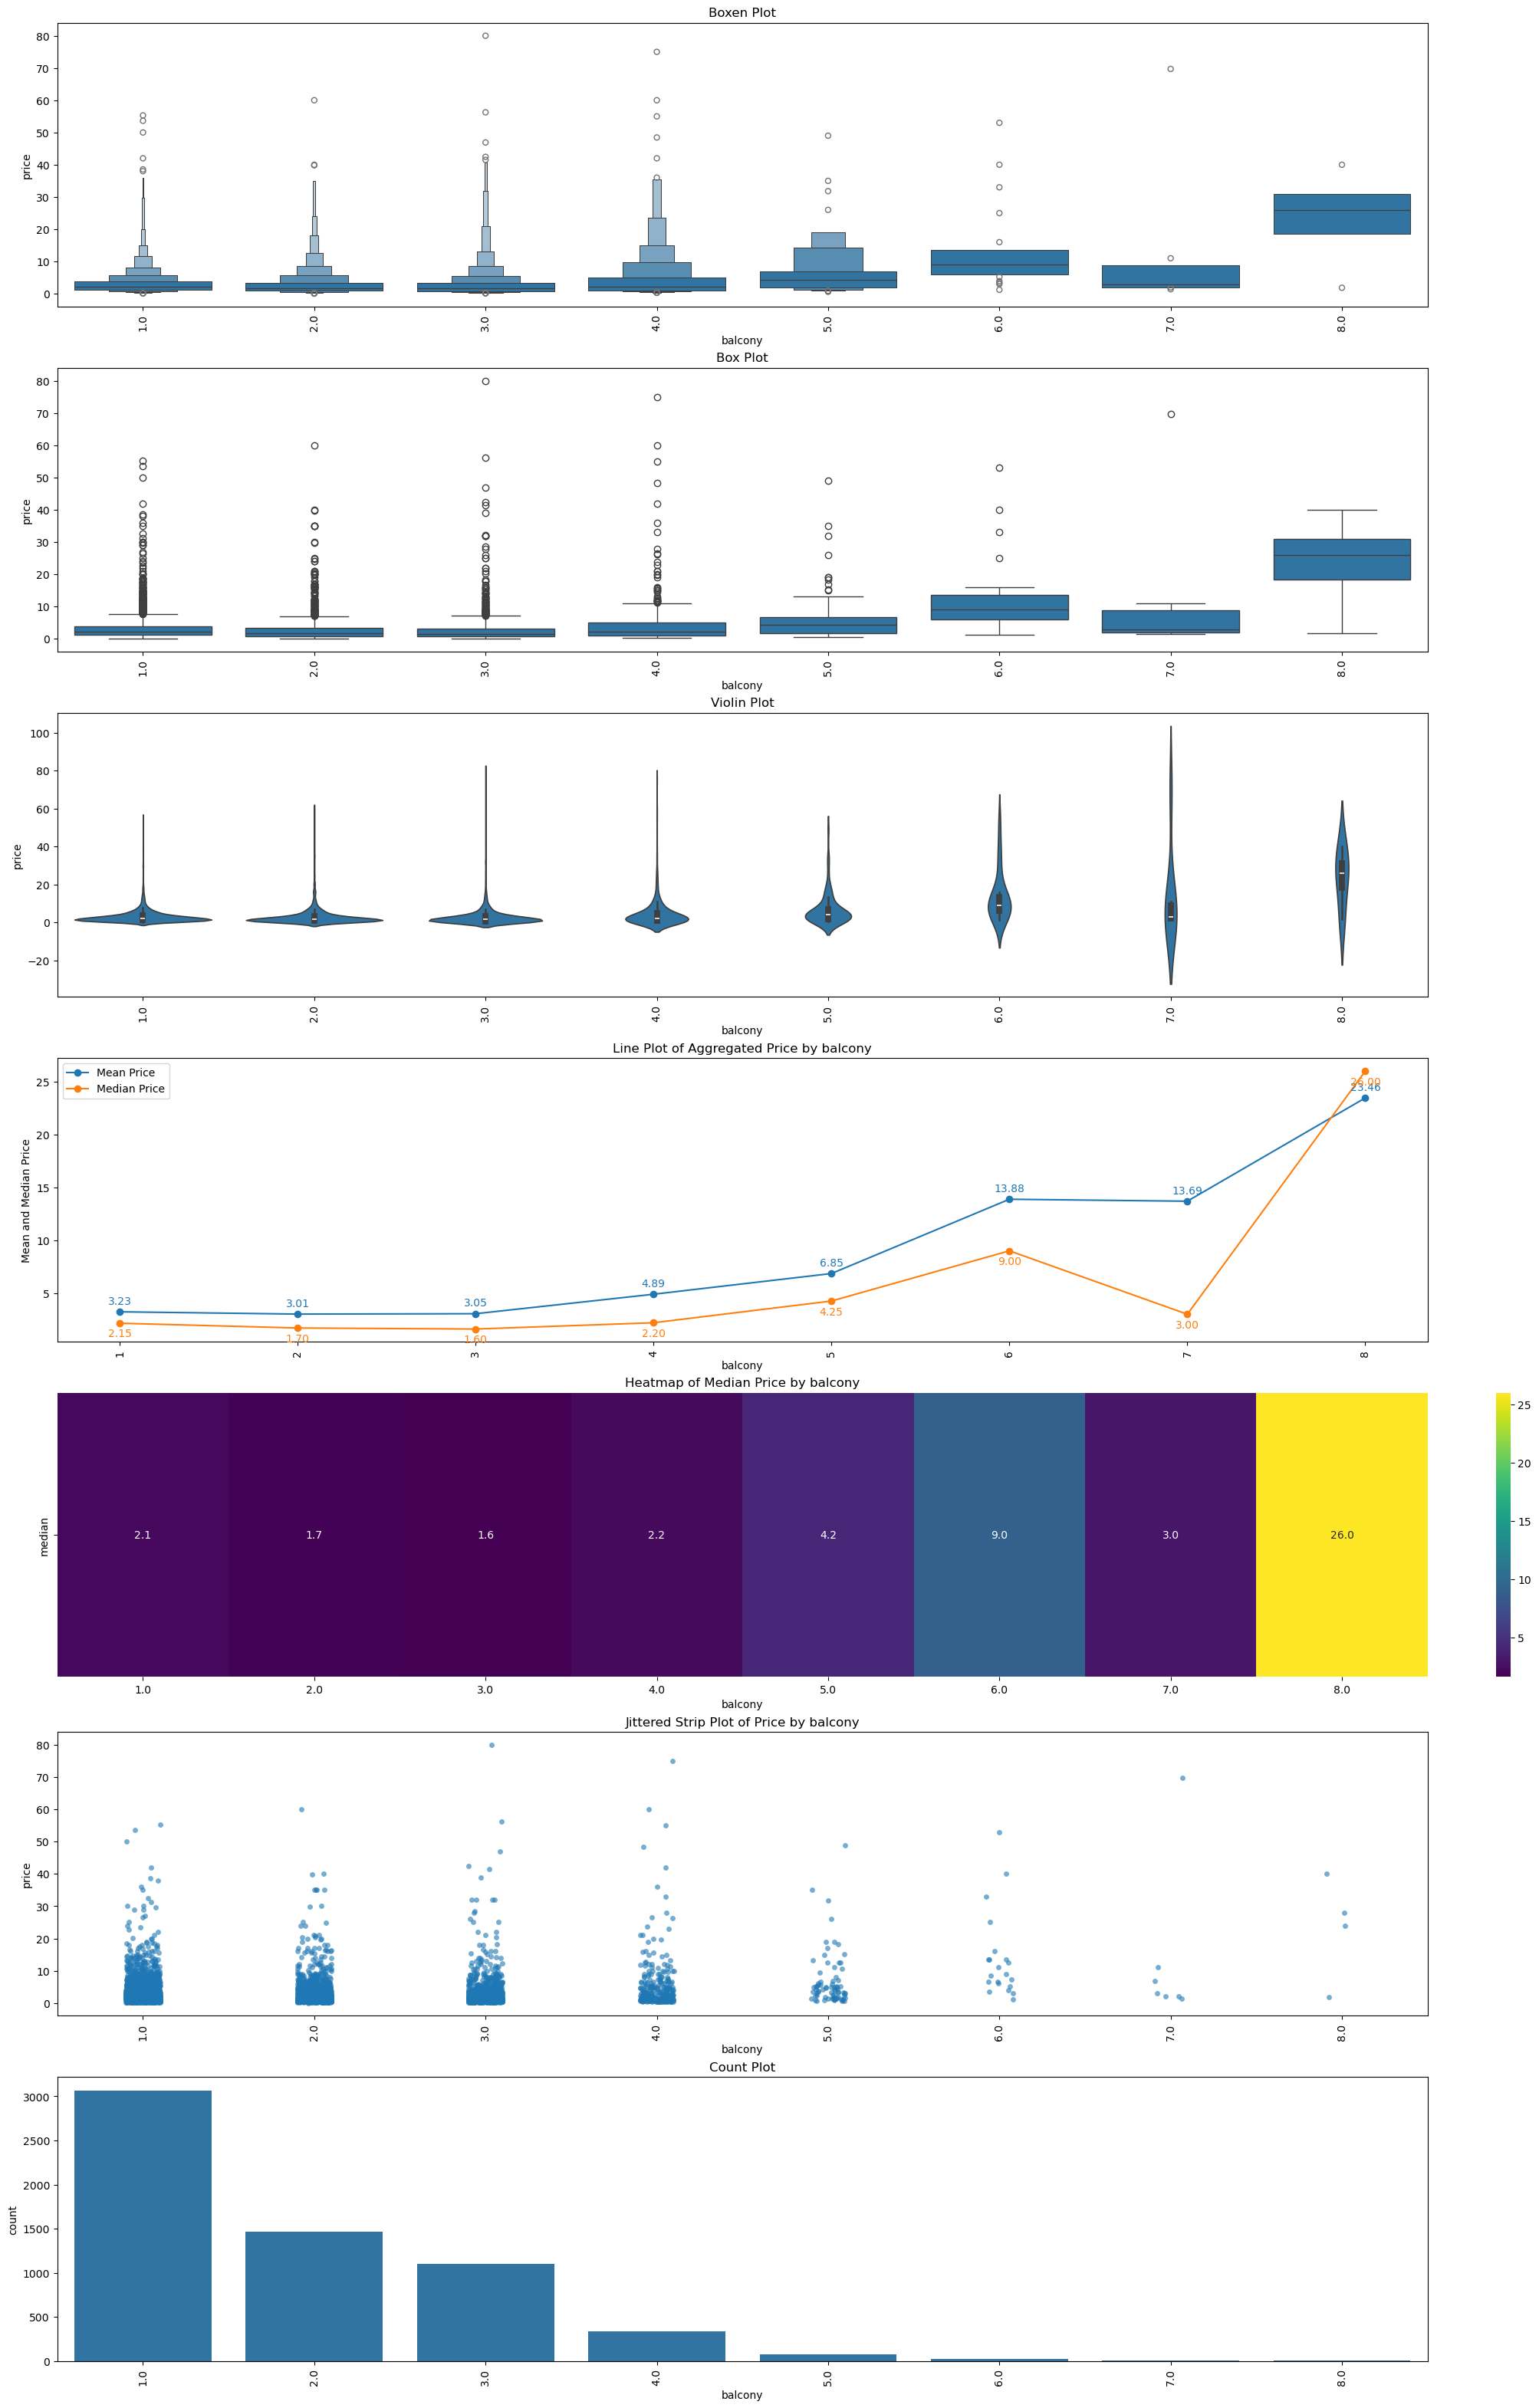

In [35]:
num_charts_plot(df, 'balcony')

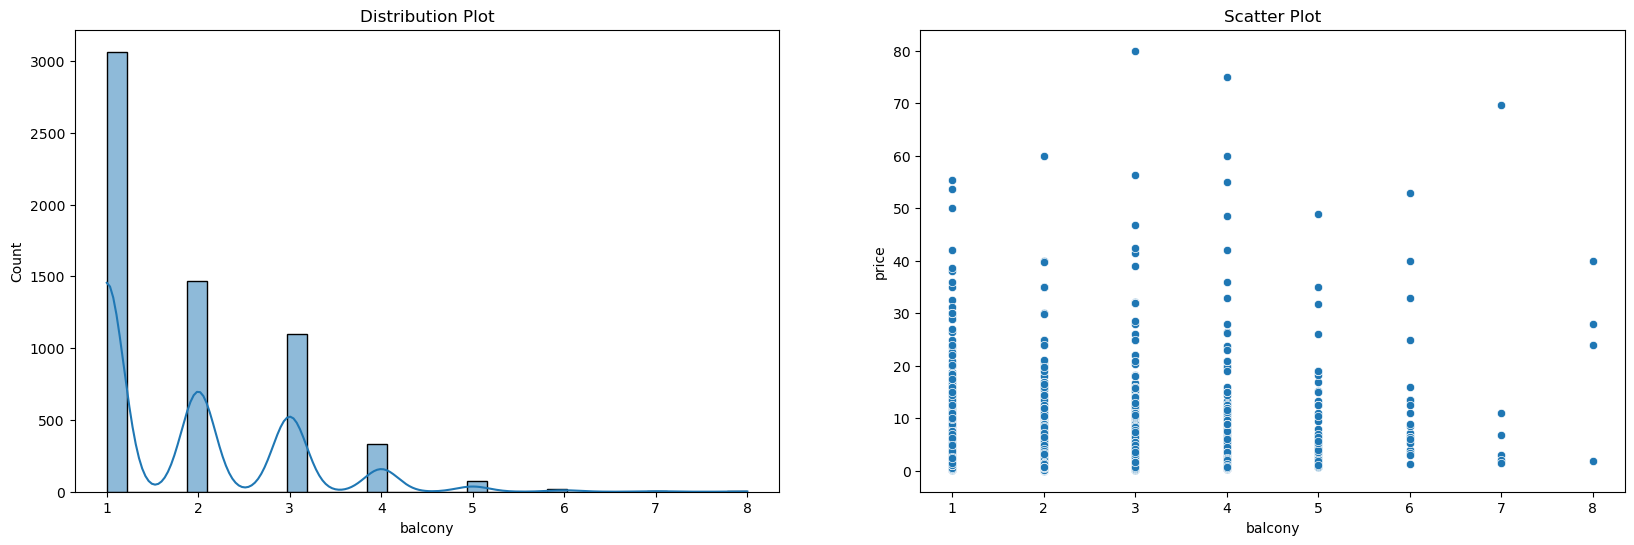

In [36]:
num_two_chart_plot(df, 'balcony')

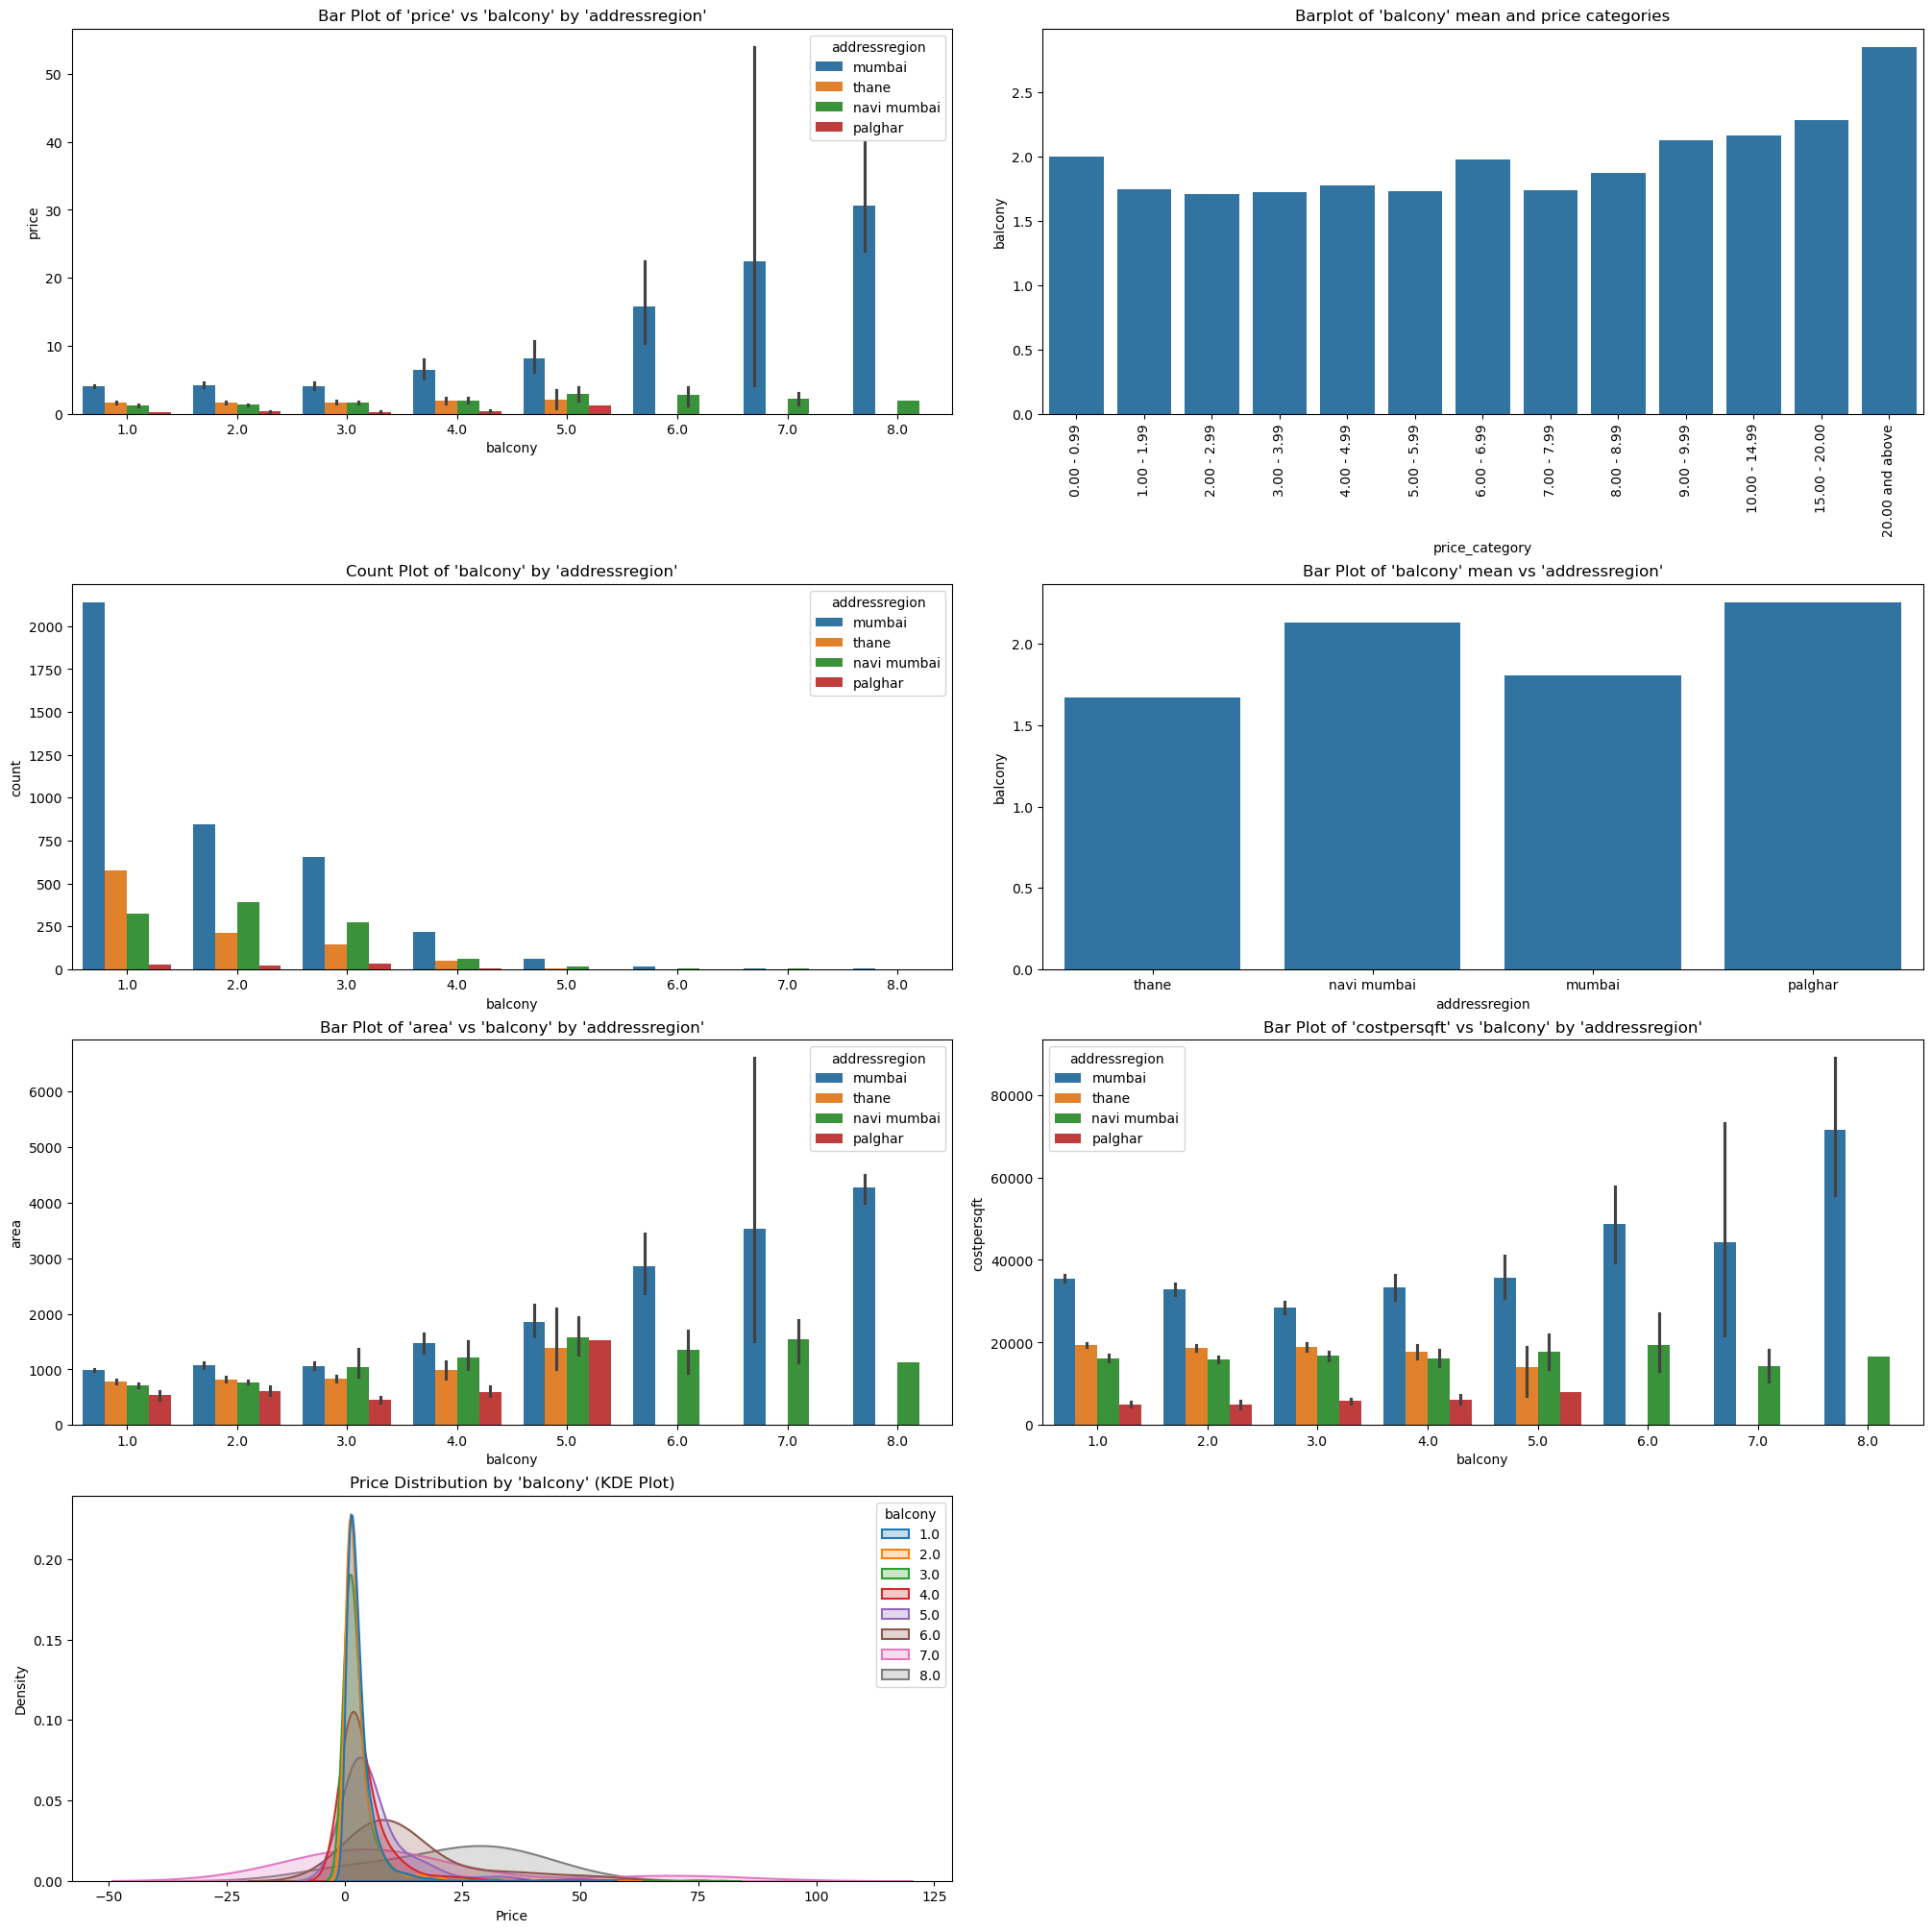

In [37]:
region_plots(df, 'balcony')

In [38]:
summarize_properties(df, 'balcony')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,3.230806,2.150,3064,2139,2.85,325,0.950,574,1.32,26,0.23
1,2.0,3.014378,1.700,1469,845,2.60,389,1.050,214,1.35,21,0.27
2,3.0,3.049243,1.600,1101,652,2.21,275,1.200,143,1.45,31,0.23
3,4.0,4.891928,2.195,332,219,3.10,58,1.400,48,1.29,7,0.31
4,5.0,6.850987,4.250,76,58,5.00,14,2.225,3,1.92,1,1.22
5,6.0,13.878095,9.000,21,18,11.75,3,3.000,0,NaN,0,NaN
6,7.0,13.692857,3.000,7,4,8.90,3,2.000,0,NaN,0,NaN
7,8.0,23.462500,26.000,4,3,28.00,1,1.850,0,NaN,0,NaN


### bed

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


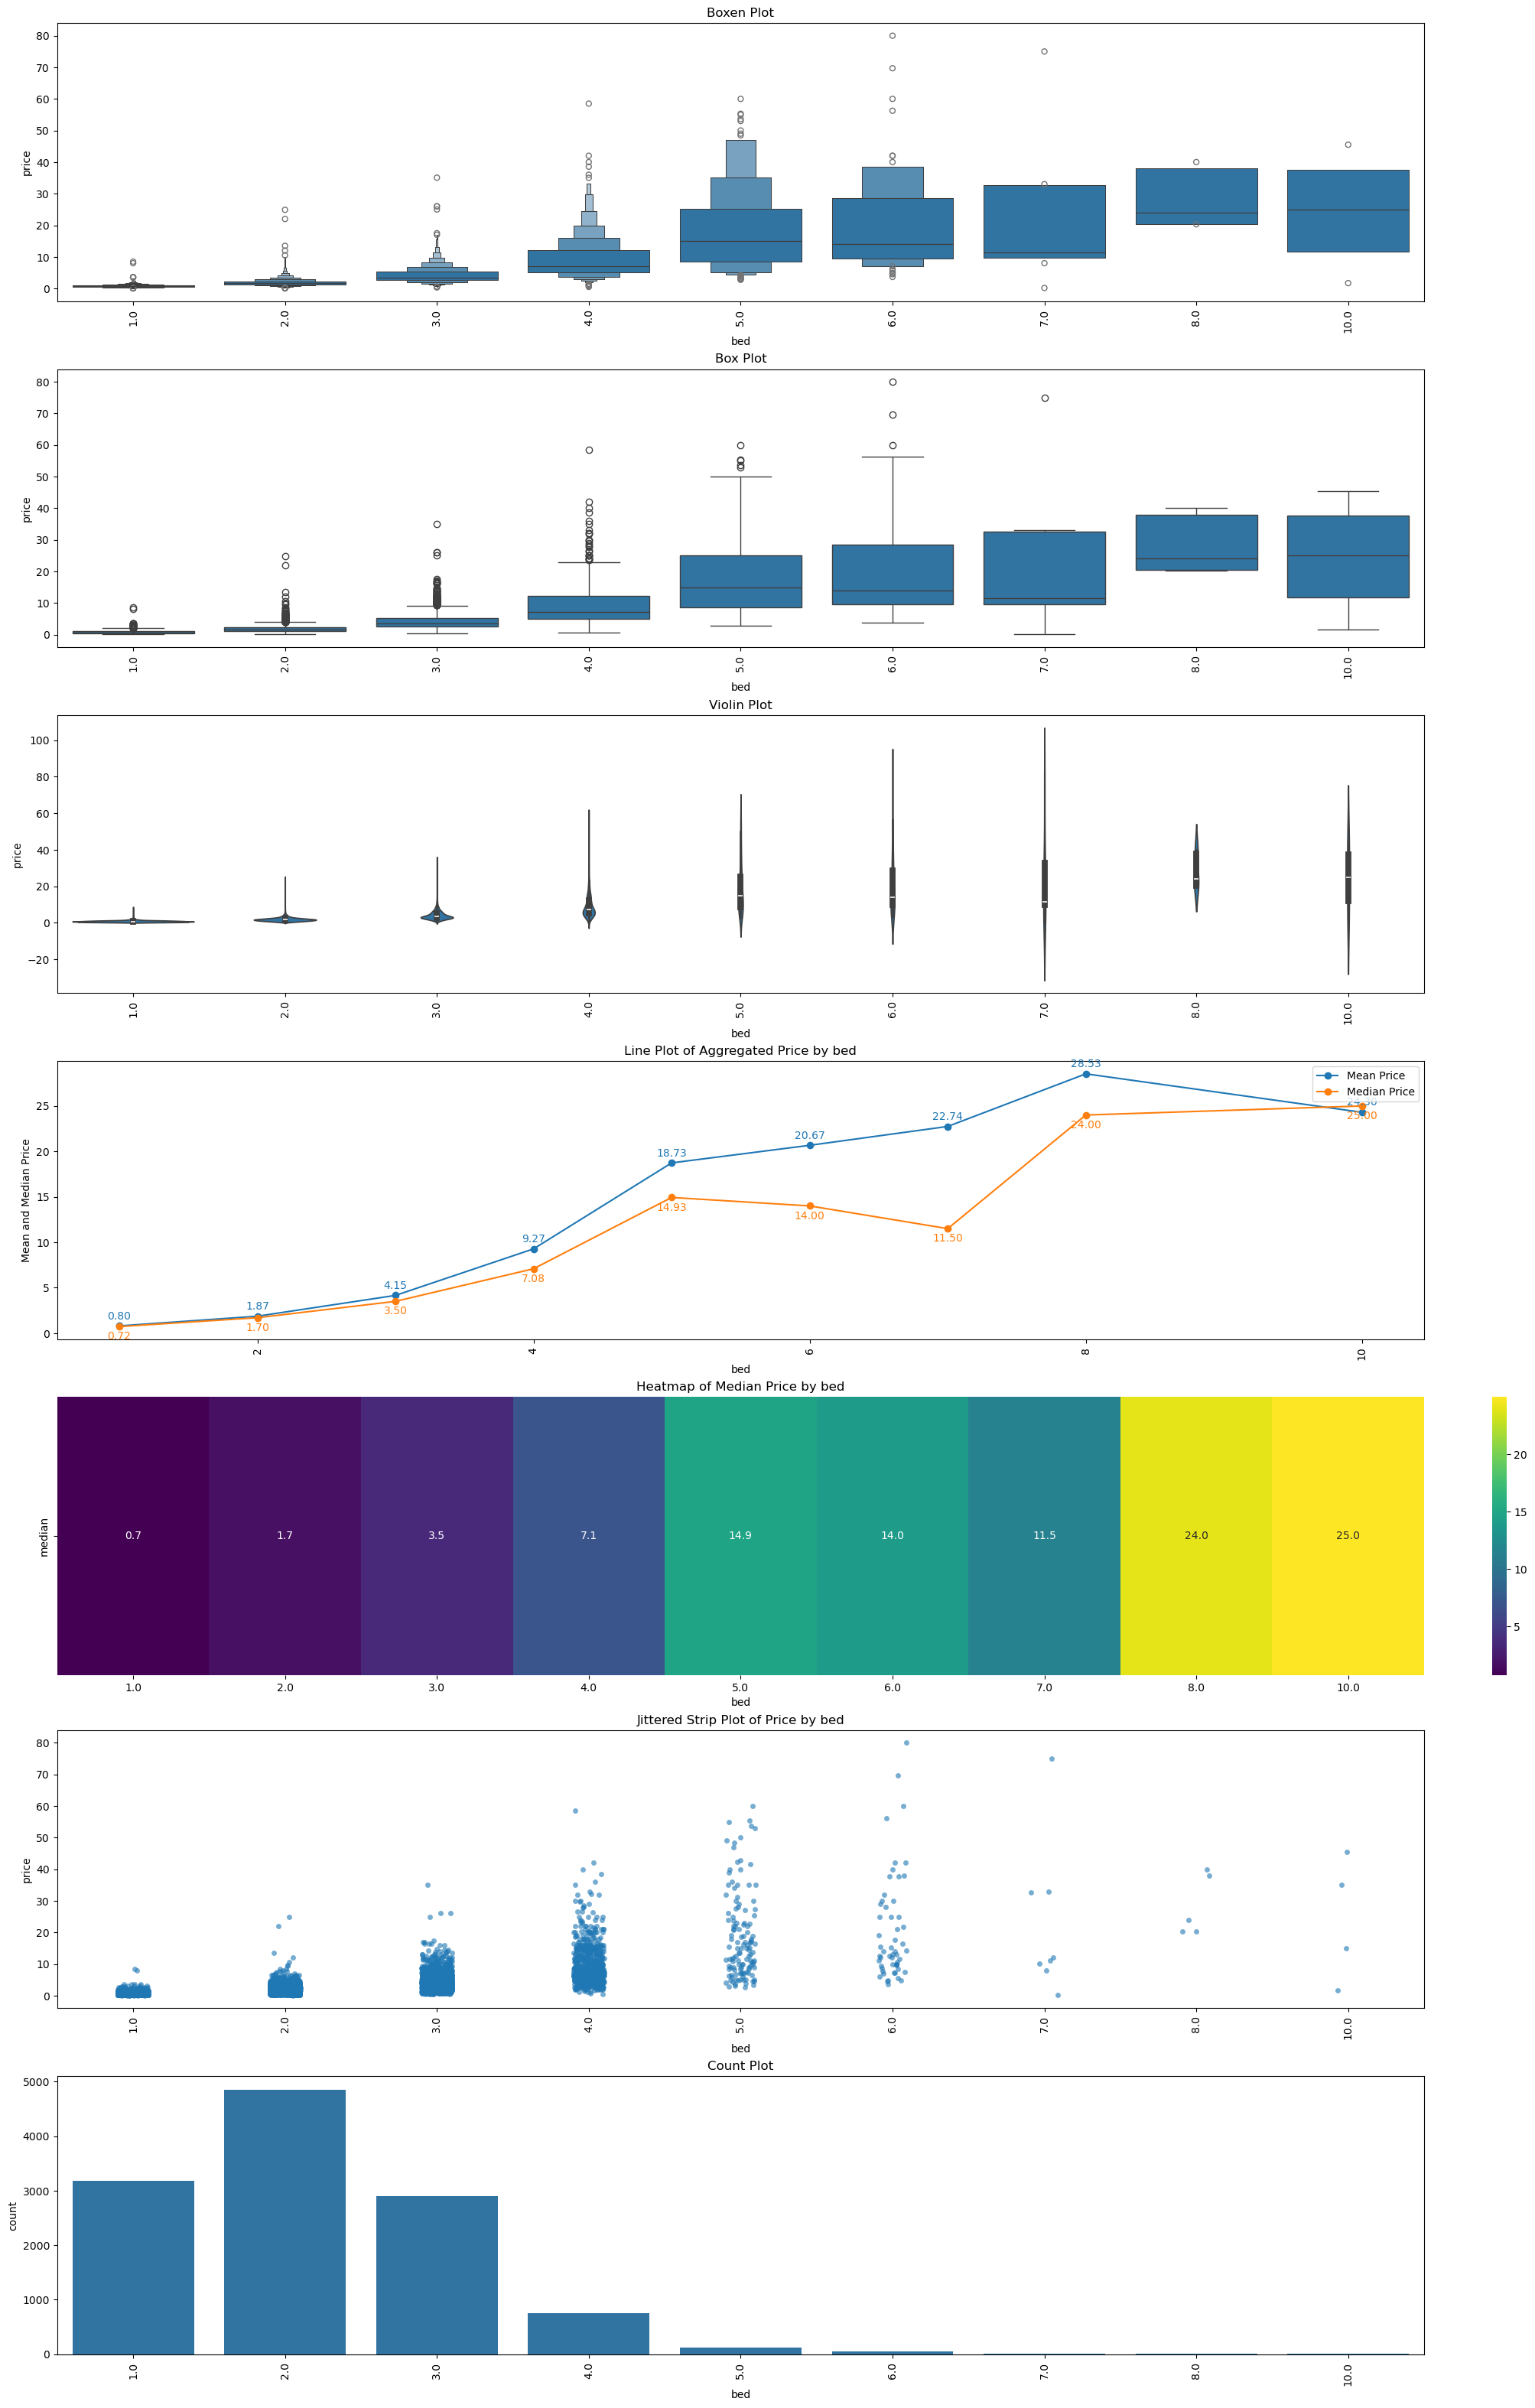

In [40]:
num_charts_plot(df, 'bed')

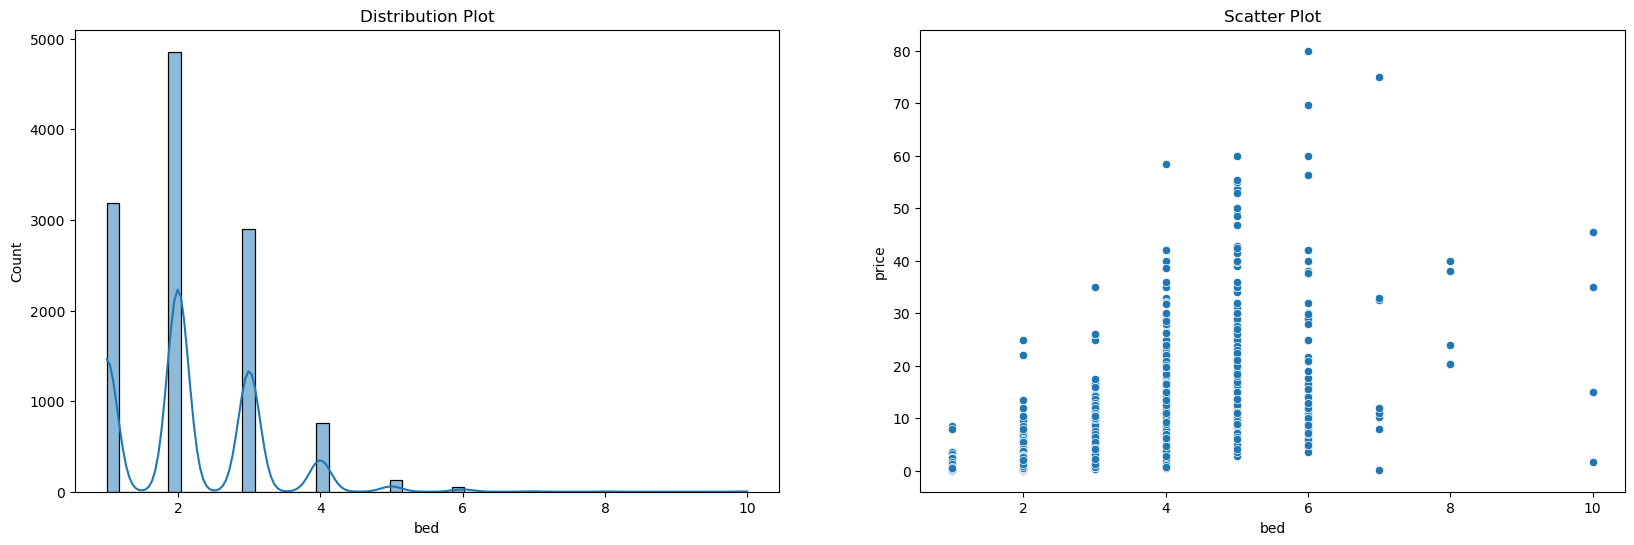

In [41]:
num_two_chart_plot(df, 'bed')

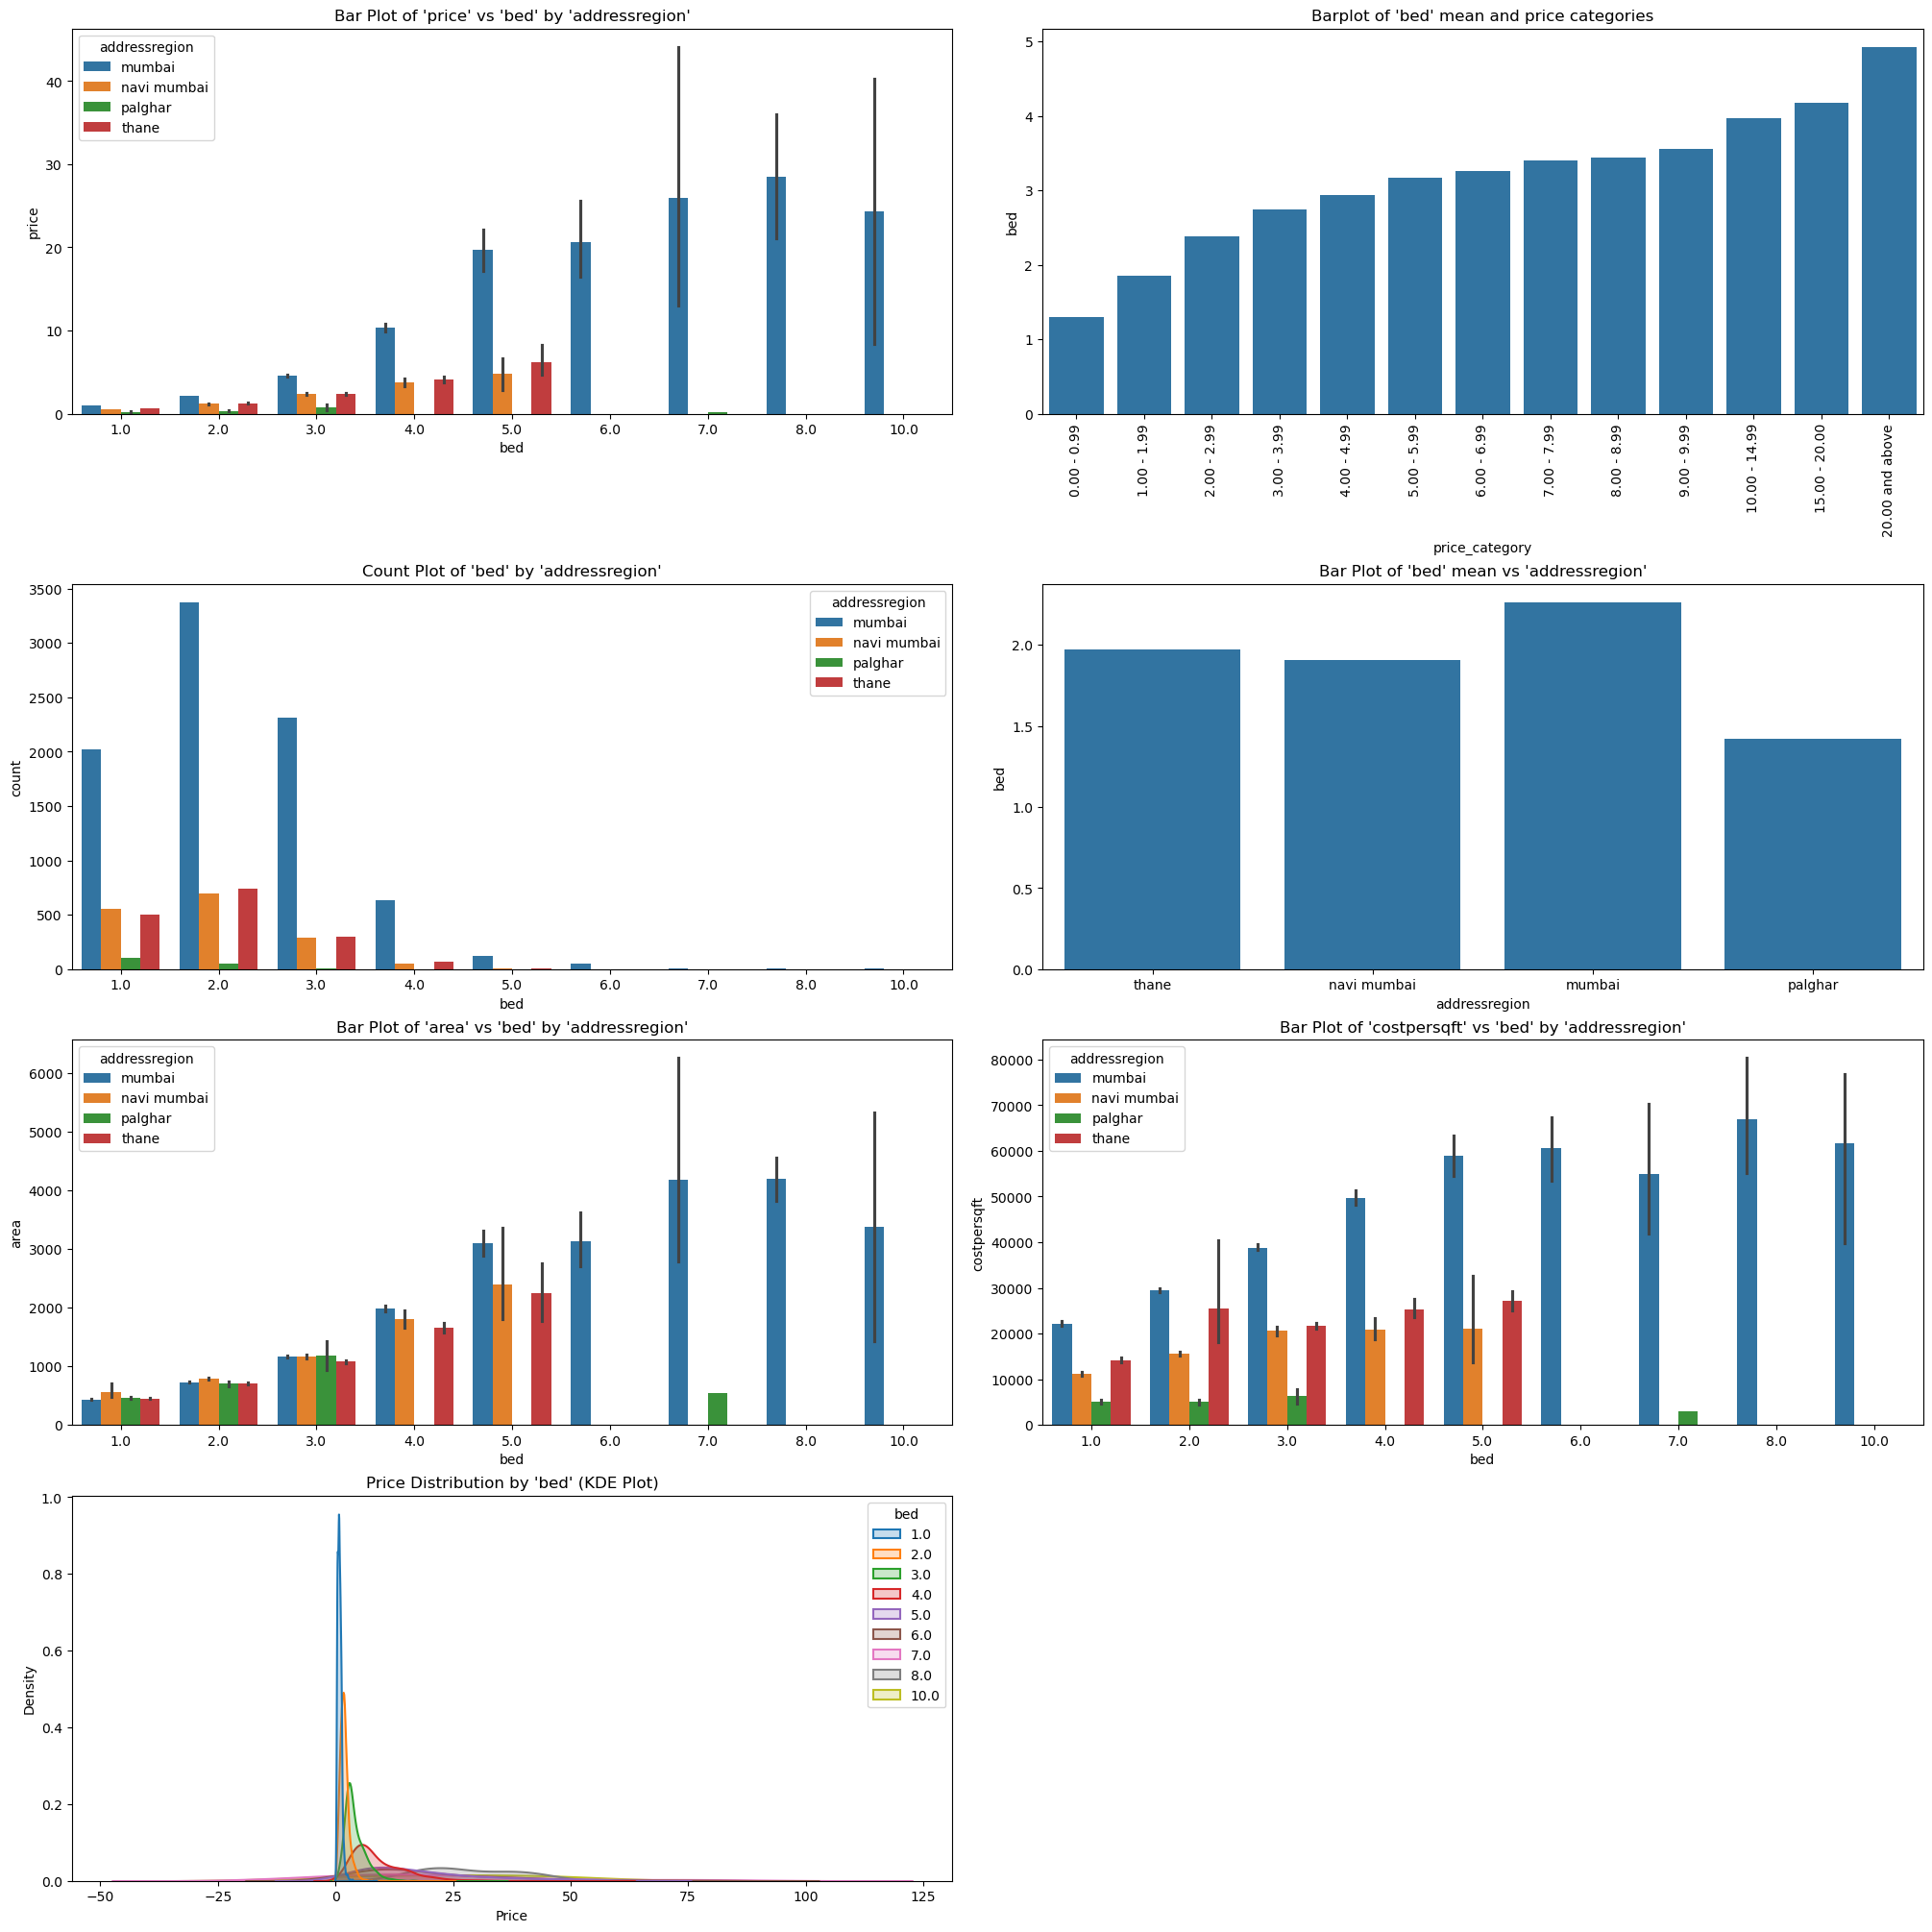

In [42]:
region_plots(df, 'bed')

In [43]:
summarize_properties(df, 'bed')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,0.798992,0.724,3183,2017,0.920,559,0.470,505,0.615,102,0.200
1,2.0,1.865351,1.700,4857,3373,1.960,694,1.090,736,1.250,54,0.302
2,3.0,4.154460,3.500,2899,2310,3.950,288,2.215,297,2.330,4,0.725
3,4.0,9.273479,7.085,756,630,8.275,54,3.495,72,3.810,0,NaN
4,5.0,18.732441,14.930,127,118,16.095,4,4.500,5,4.850,0,NaN
5,6.0,20.666909,14.000,55,55,14.000,0,NaN,0,NaN,0,NaN
6,7.0,22.742500,11.500,8,7,12.000,0,NaN,0,NaN,1,0.160
7,8.0,28.530000,24.000,5,5,24.000,0,NaN,0,NaN,0,NaN
8,10.0,24.297500,24.995,4,4,24.995,0,NaN,0,NaN,0,NaN


## `numerical columns with more than 15 unique values`

In [45]:
# Find numerical columns with more than 15 unique values
low_cardinality_columns = [col for col in numerical_columns if df[col].nunique() > 15]

print("Numerical columns with more than 15 unique categories:")
print(low_cardinality_columns)
print("-"*100)
print(f"Total: {len(low_cardinality_columns)}")

Numerical columns with more than 15 unique categories:
['available_units', 'towers', 'locality_rank', 'locality_rating', 'price', 'area', 'costpersqft', 'flat_on_floor', 'total_floor', 'lattitude', 'longitude', 'emi', 'project_in_acres']
----------------------------------------------------------------------------------------------------
Total: 13


In [46]:
len(df['total_floor'].value_counts())

85

In [47]:
#towers - 42
#locality_rating - 26
#flat_on_floor - 71
#total_floor - 85

### towers

C:\Users\ABC\AppData\Local\Temp\ipykernel_4516\4069217703.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


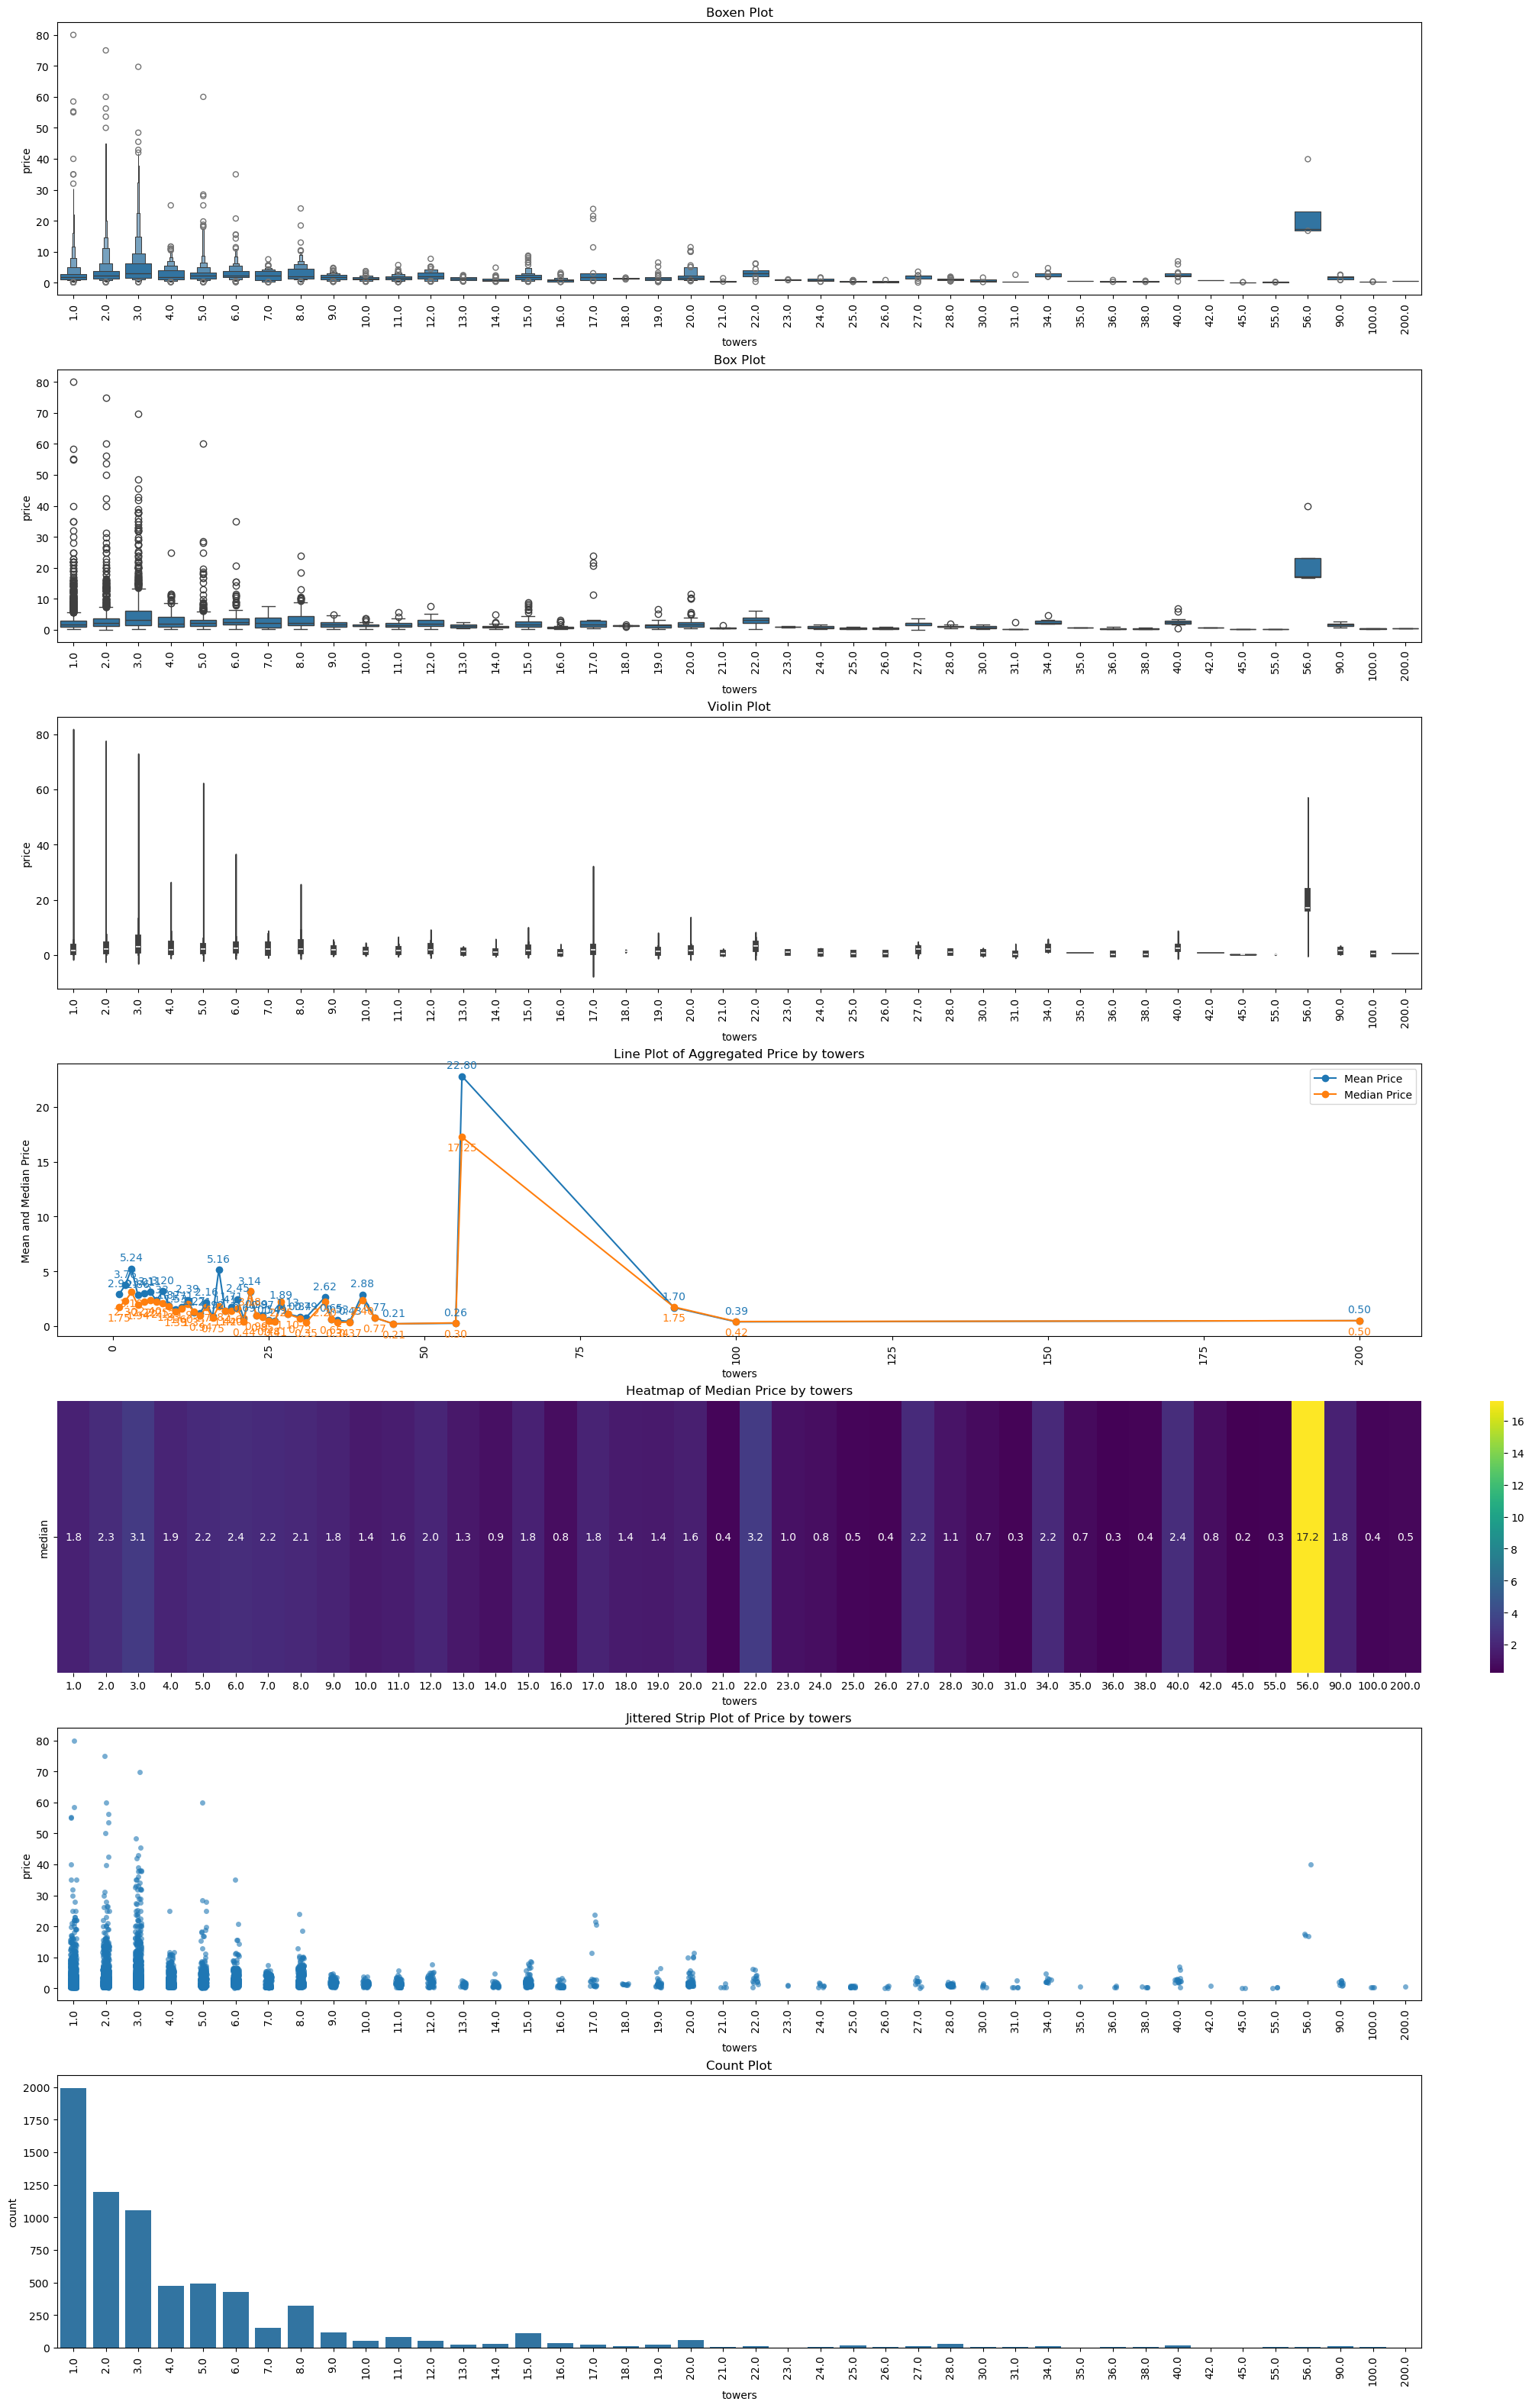

In [48]:
num_charts_plot(df, 'towers')

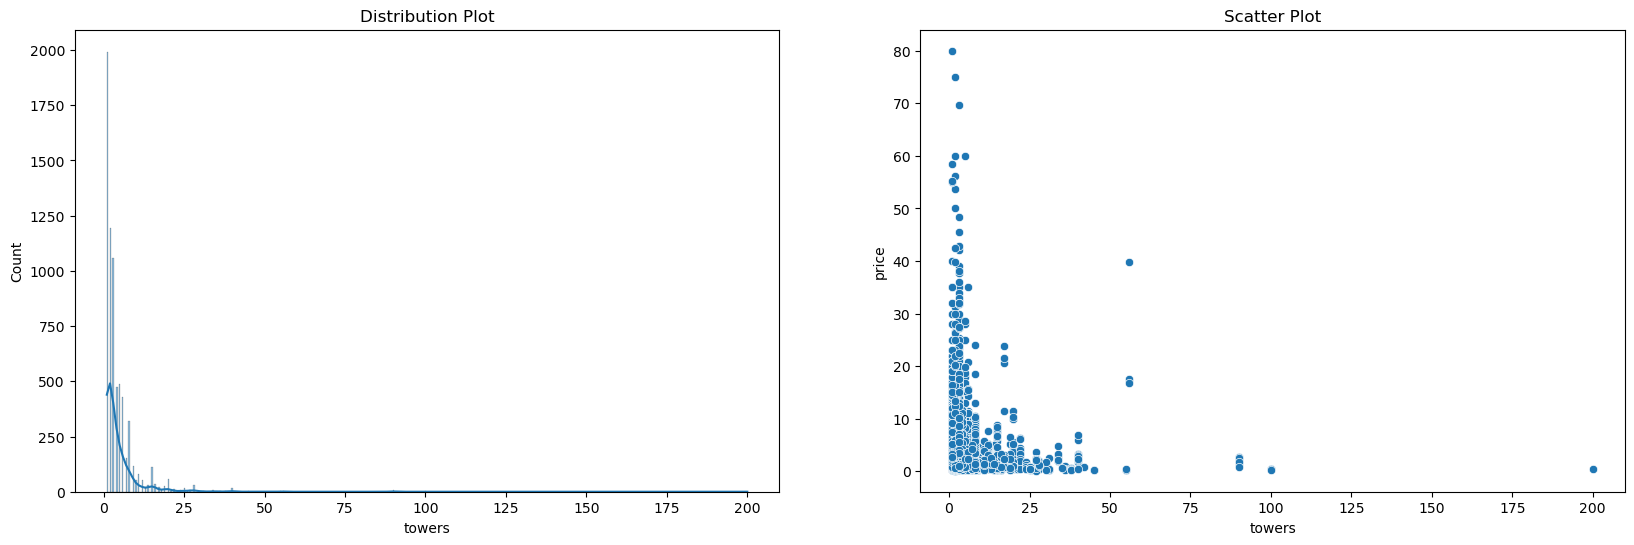

In [49]:
num_two_chart_plot(df, 'towers')

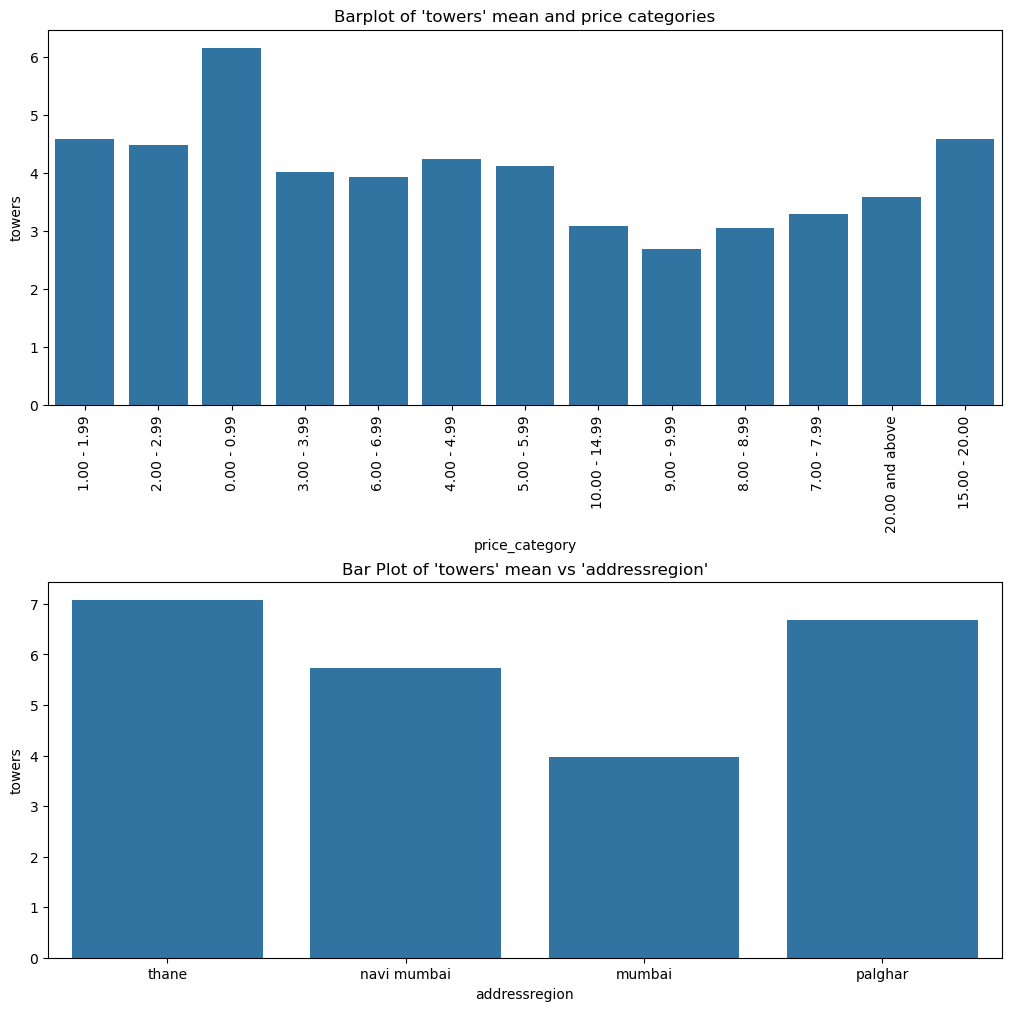

In [8]:
region_plots_high_card(df, 'towers')

In [51]:
summarize_properties(df, 'towers')

,feature_value,price_mean,price_median,count,mumbai,mumbai_median_price,navi mumbai,navi mumbai_median_price,thane,thane_median_price,palghar,palghar_median_price
0,1.0,2.904554,1.7500,1992,1538,1.9950,241,1.1000,200,1.505,13,0.2000
1,2.0,3.763442,2.3000,1193,946,2.6400,144,1.7150,103,1.150,0,NaN
2,3.0,5.241785,3.1000,1057,887,3.5500,81,1.2500,85,1.250,4,0.2750
3,4.0,2.858887,1.9350,476,354,2.7000,58,1.2500,62,1.200,2,0.2700
4,5.0,3.013174,2.2200,489,339,2.6300,27,1.4500,122,1.215,1,0.2500
5,6.0,3.106977,2.4000,429,350,2.6200,62,1.8450,16,1.250,1,0.2200
6,7.0,2.334298,2.2500,151,110,2.7250,17,0.5900,23,1.100,1,0.2600
7,8.0,3.204761,2.1200,322,215,3.8000,11,0.7000,96,1.480,0,NaN
8,9.0,1.871661,1.8300,115,43,1.9900,17,0.5700,55,1.850,0,NaN
9,10.0,1.527593,1.3500,54,20,1.5100,4,1.3250,30,1.420,0,NaN


### area

In [53]:
#num_charts_plot(df, 'area')

In [54]:
#num_two_chart_plot(df, 'area')

In [55]:
#region_plots(df, 'area')

In [56]:
#summarize_properties(df, 'area').head()

### locality_rank

In [58]:
#num_charts_plot(df, 'locality_rank')

In [59]:
#num_two_chart_plot(df, 'locality_rank')

In [60]:
#region_plots(df, 'locality_rank')

In [61]:
#summarize_properties(df, 'locality_rank')

In [25]:
df.groupby(['balcony'])['costpersqft'].median().sort_values(ascending = False)

balcony
8.0    62907.0
6.0    36000.0
5.0    28058.5
1.0    27552.0
2.0    22353.0
4.0    21418.5
3.0    18884.0
7.0    18237.0
Name: costpersqft, dtype: float64

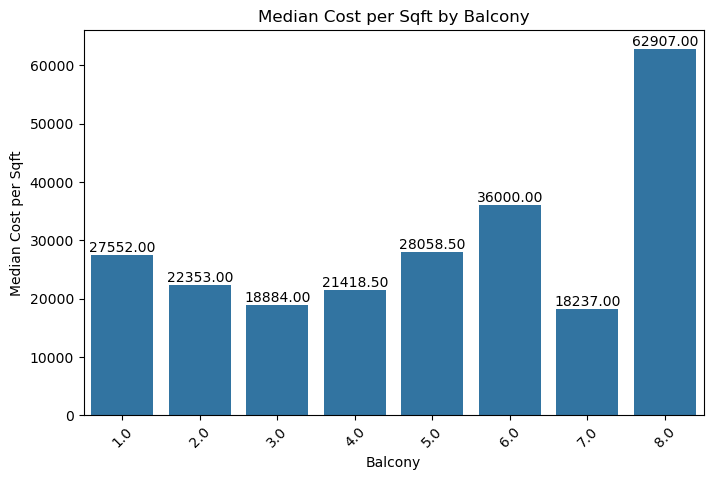

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute median cost per sqft for each balcony category
median_cost = df.groupby(['balcony'])['costpersqft'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=median_cost.index, y=median_cost.values)  # uses default colors

# Annotate each bar with the median costpersqft value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', 
            ha='center', va='bottom')

# Labels and title
plt.xlabel("Balcony")
plt.ylabel("Median Cost per Sqft")
plt.title("Median Cost per Sqft by Balcony")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()


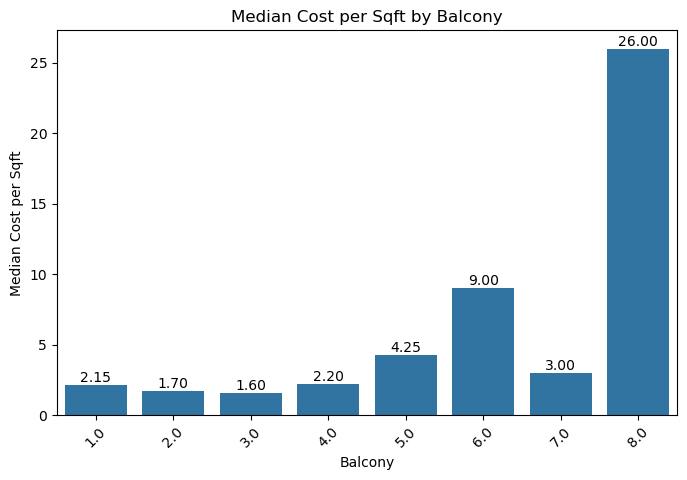

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute median cost per sqft for each balcony category
median_cost = df.groupby(['balcony'])['price'].median().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=median_cost.index, y=median_cost.values)  # uses default colors

# Annotate each bar with the median costpersqft value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', 
            ha='center', va='bottom')

# Labels and title
plt.xlabel("Balcony")
plt.ylabel("Median Cost per Sqft")
plt.title("Median Cost per Sqft by Balcony")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()
